**SC62614_Indra Fiqi Ripani_Data Preprocessing**

**Heart Disease Dataset**

### **Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Library Python**

In [2]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

### **Import Dataset**

In [3]:
csv_path = '/content/drive/MyDrive/GoogleColab/heart.csv'

# Membaca data Excel ke dalam DataFrame Pandas
df = pd.read_csv(csv_path)

# Menampilkan 10 baris pertama dari DataFrame
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
# Menampilkan 10 baris terakhir dari DataFrame
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### **Informasi Heart Disease Dataset**

Ini dilakukan untuk melihat informasi dataset, seperti jumlah kolom dan baris, nilai minimum dan maksimum dari setiap kolom, dan rata-rata nilainya.

In [5]:
print("Tipe Data Kolom:")
print(df.dtypes)

jumlah_baris, jumlah_kolom = df.shape
print(f"\nJumlah Baris : {jumlah_baris}")
print(f"Jumlah Kolom : {jumlah_kolom}")

print("\nInformasi DataFrame:")
print(df.info())

Tipe Data Kolom:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Jumlah Baris : 1025
Jumlah Kolom : 14

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca       

Dapat diketahui bahwasanya dataset memiliki 14 kolom dan 1025 baris dengan 13 kolom bertipe data integer dan 1 kolom bertipe data float.

In [6]:
# Describe Dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


## **Data Preparation**

### **Memeriksa Missing Value pada Dataset**

<Axes: >

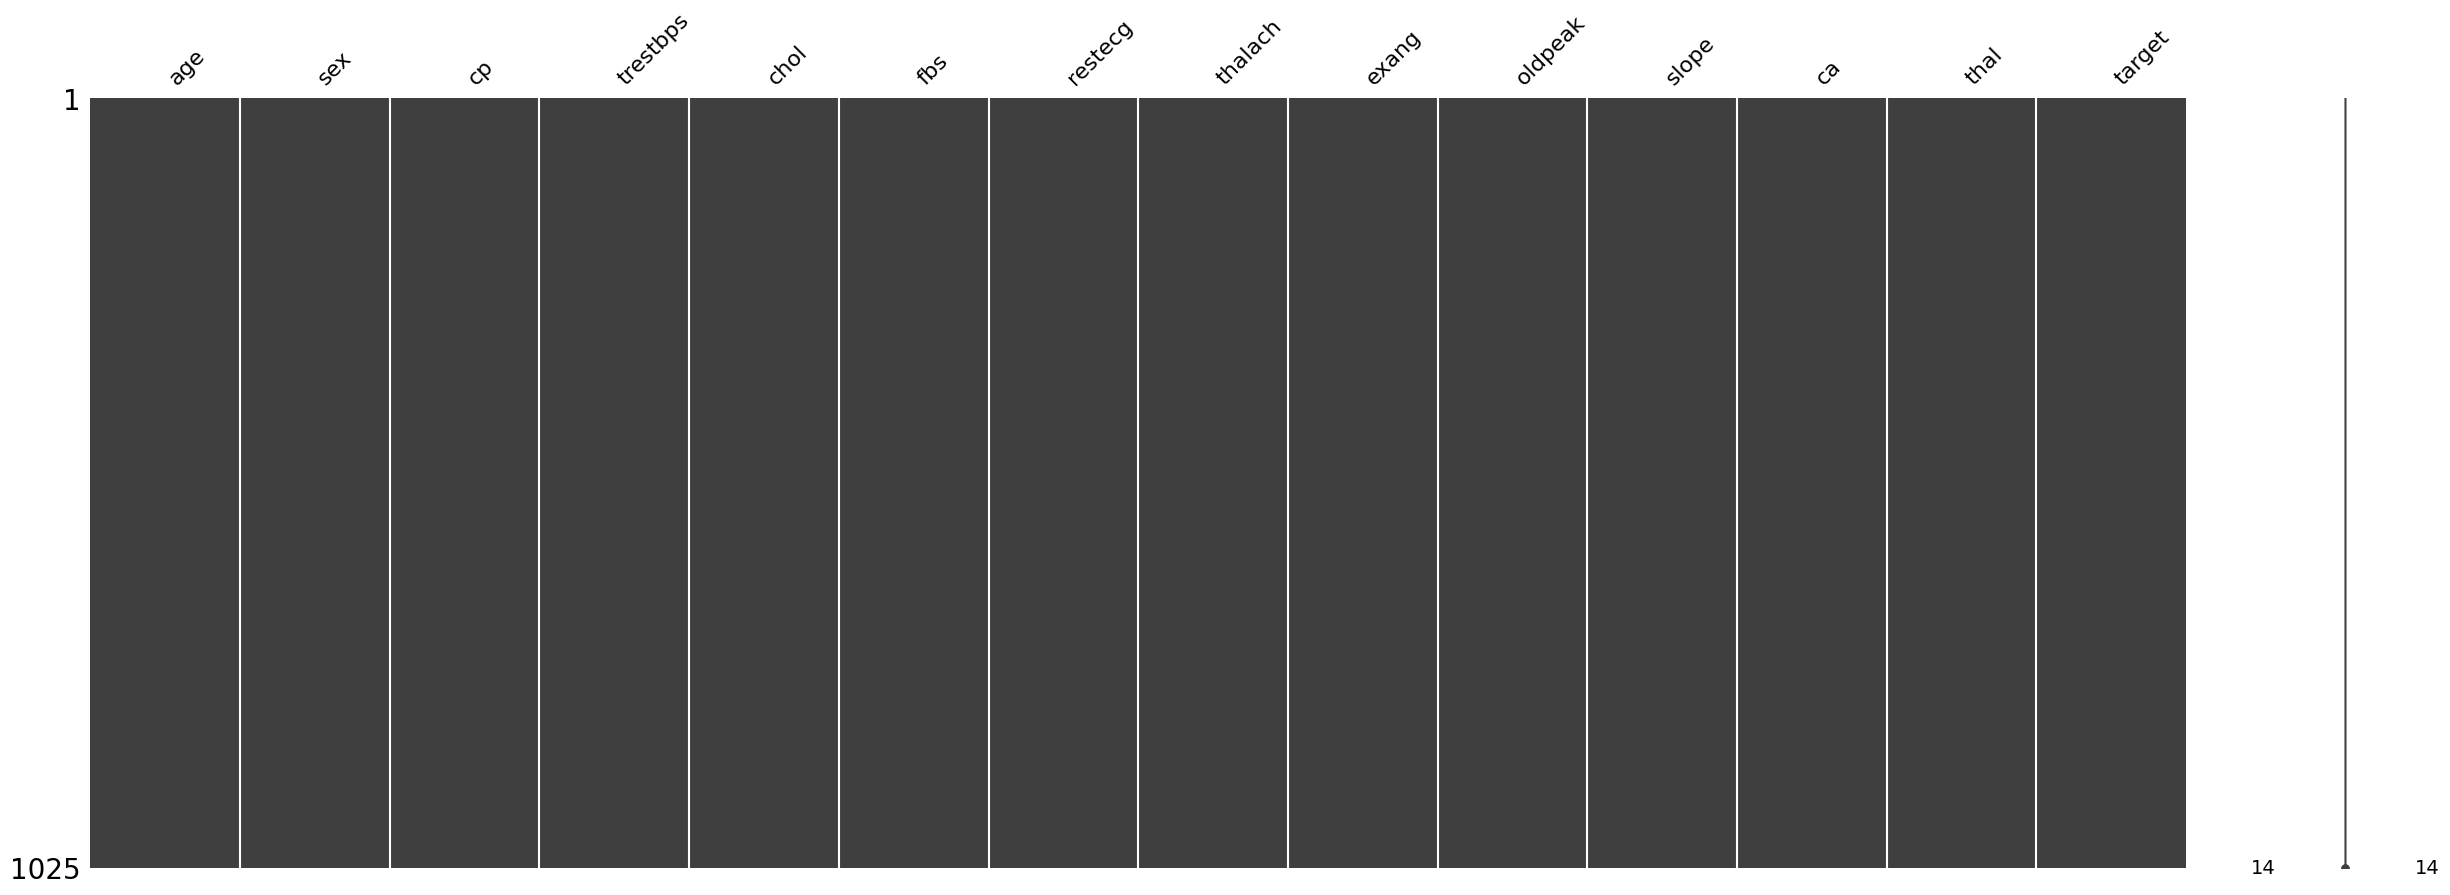

In [7]:
# Memeriksa missing value dengan visualisasi grafik plot
missingno.matrix(df, figsize = (30,10))

In [8]:
# Cara alternatif memeriksa missing value dengan menghitung jumlah nilai yang hilang dalam setiap kolom dataframe
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Dapat diketahui dengan pasti bahwa pada dataset tidak memiliki missing value.

### **Memeriksa Duplicate Value pada Dataset**

In [9]:
# Memeriksa duplikat dalam dataframe
duplicate_rows = df.duplicated().sum()

# Menampilkan hasil
if duplicate_rows == 0:
    print("Tidak ada nilai duplikat dalam dataset.")
else:
    print("Nilai duplikat dalam dataset ditemukan sebanyak :", duplicate_rows)

Nilai duplikat dalam dataset ditemukan sebanyak : 723


Berdasarkan pengecekkan, terdapat data duplikat sebanyak 723 baris. Data duplikat tersebut akan dihapus.

In [10]:
# Menghapus baris dengan nilai duplikat dari dataframe
df = df.drop_duplicates()

# Menampilkan informasi terbaru dari dataframe setelah penghapusan nilai duplikat
print("Informasi DataFrame Terbaru:")
print(df.info())

duplicate_rows = df.duplicated().sum()
print("\nNilai duplikat dalam dataset ditemukan sebanyak :", duplicate_rows)

Informasi DataFrame Terbaru:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB
None

Nilai duplikat dalam dataset ditemukan sebanyak : 0


### **Memeriksa Outlier pada Dataset**

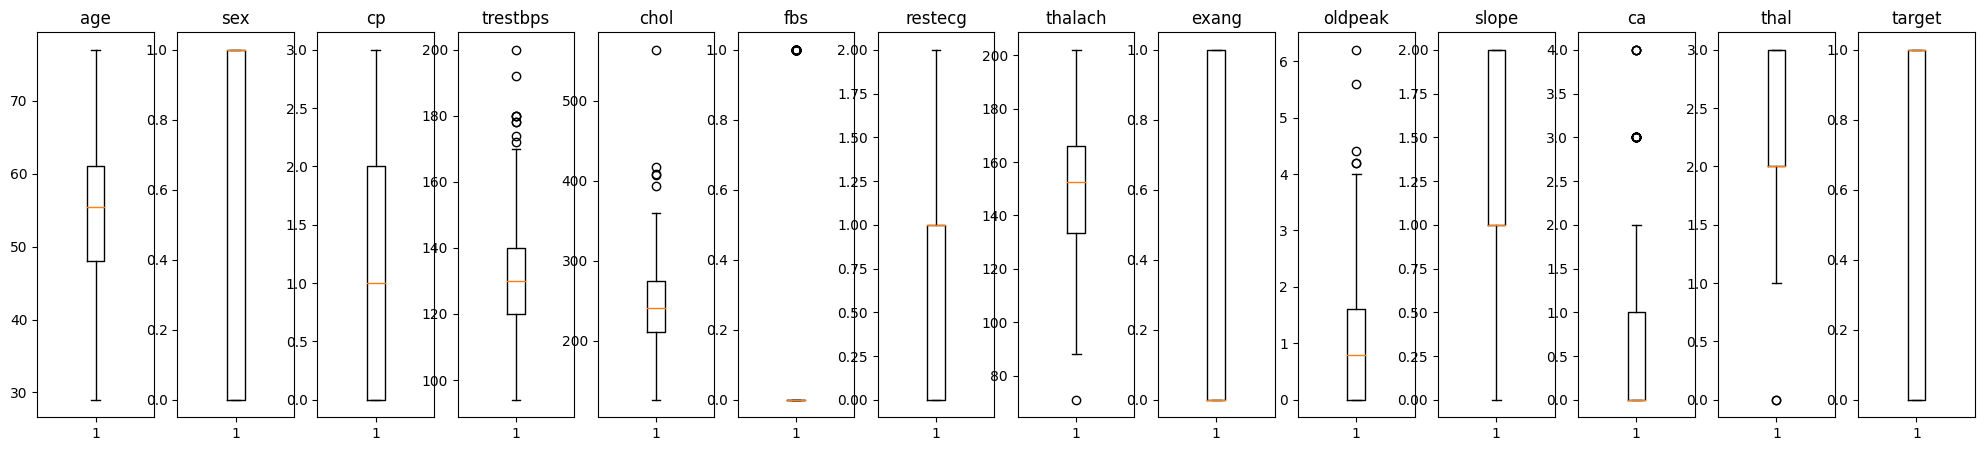

In [11]:
fig, axs = plt.subplots(ncols=len(df.columns), figsize=(25,5))
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
plt.show()

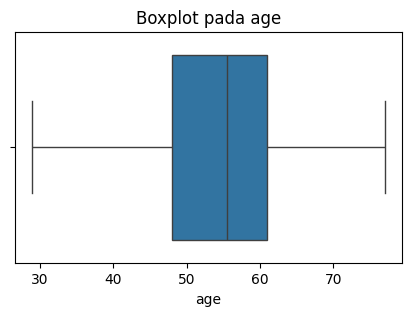

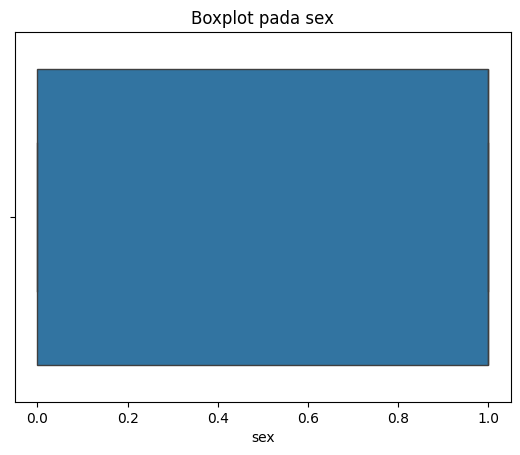

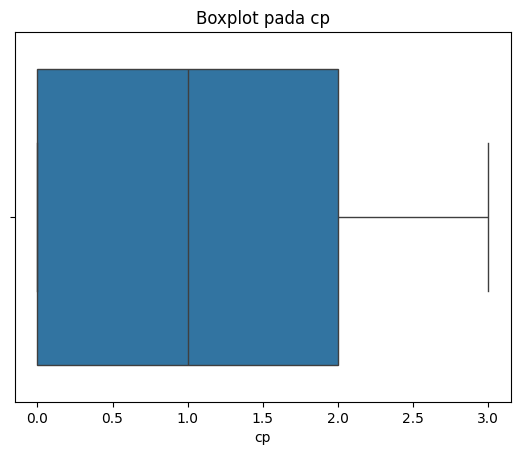

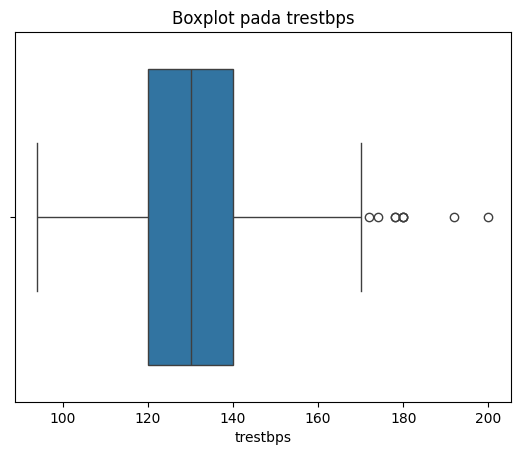

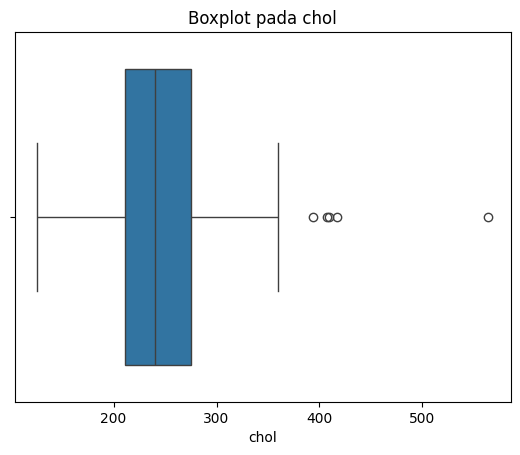

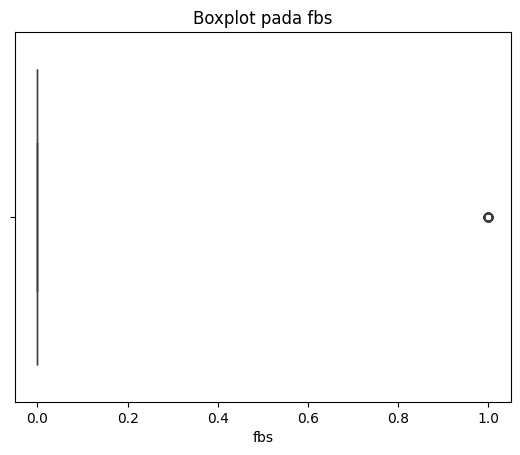

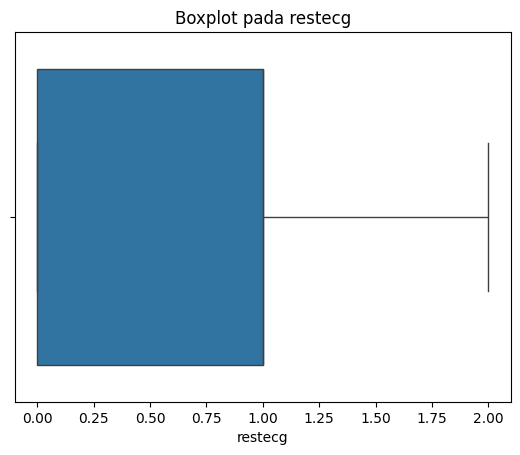

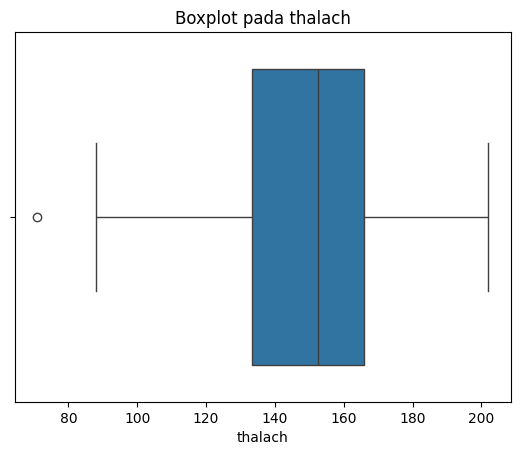

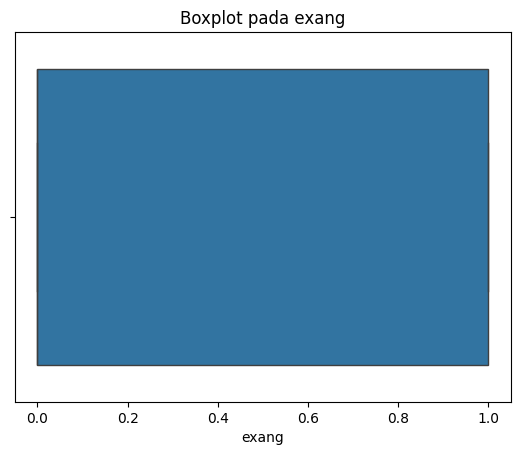

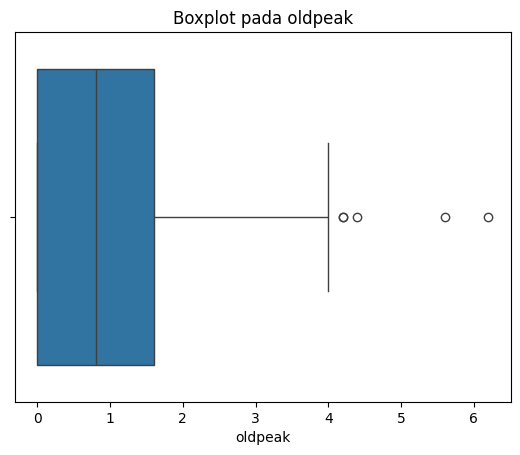

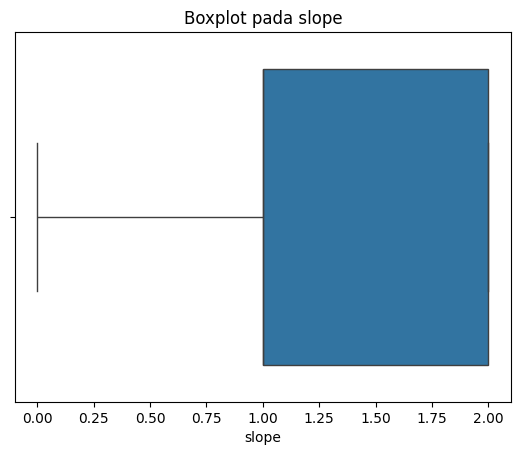

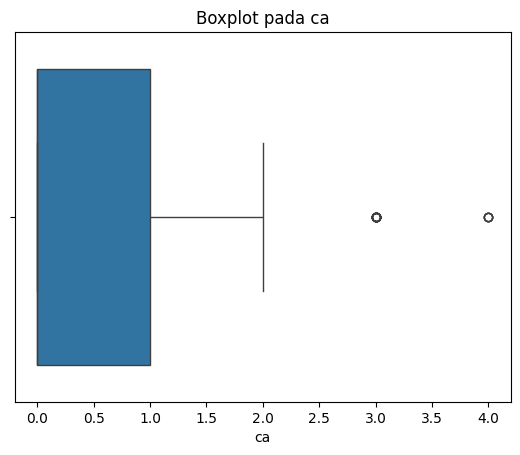

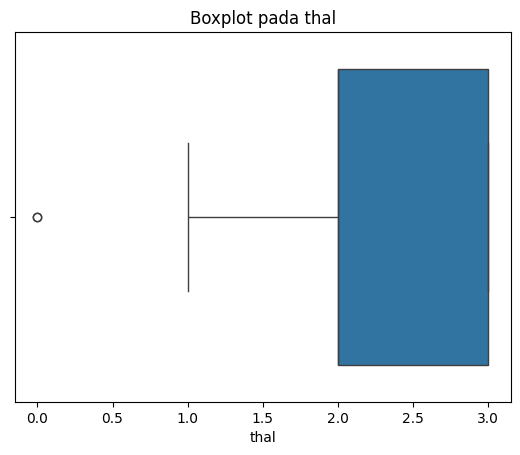

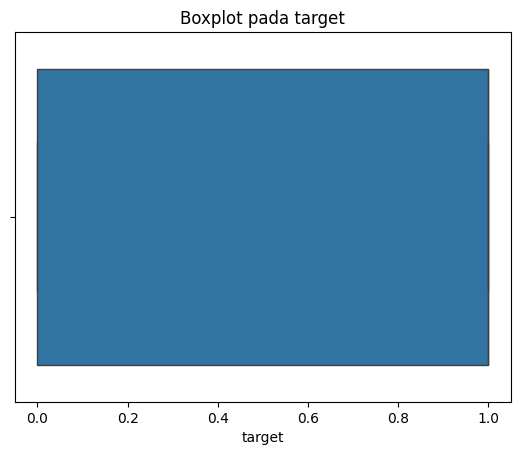

In [12]:
# Alternatif visualisasi outlier pada setiap kolom

# List kolom untuk membuat boxplot
numerical_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Set ukuran gambar
plt.figure(figsize = (5, 3))

# Buat boxplot dari masing masing kolom untuk mengecek outlier
for feature in numerical_features:
    sns.boxplot( x = df[feature], data = df)
    plt.title(f'Boxplot pada {feature}')
    plt.show()

Berdasarkan boxplot di atas, outlier terdapat pada kolom trestbps, chol, fbs, thalach, oldpeak, ca, dan thal.

Outlier pada kolom ca dan thal perlu dihilangkan karena nilai kolom ca seharusnya antara 0 - 3 dan pada kolom thal seharusnya  nilainya 1, 2, atau 3. sehingga diluar dari range tersebut perlu untuk dieliminasi.

In [13]:
# Menghapus outliers pada kolom ca dan thal
df = df[(df['ca'] <= 3) & (df['thal'] != 0)]

# Memeriksa apakah masih ada outliers dengan nilai ca > 3 dan thal = 0
outliers_exist = df.loc[(df['ca'] > 3) & (df['thal'] == 0)].shape[0] > 0

if outliers_exist:
    print("Masih ada outliers dengan nilai ca > 3 dan thal = 0.")
else:
    print("Tidak ada outliers dengan nilai ca > 3 dan thal = 0.")

Tidak ada outliers dengan nilai ca > 3 dan thal = 0.


In [14]:
# Menentukan batas atas dan batas bawah
q1 = np.percentile(df['chol'], 25)
q3 = np.percentile(df['chol'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Menghapus outliers pada kolom chol
df = df[(df['chol'] >= lower_bound) & (df['chol'] <= upper_bound)]

# Memeriksa apakah masih ada outliers dalam kolom 'chol'
outliers_exist = df.loc[(df['chol'] < lower_bound) | (df['chol'] > upper_bound)].shape[0] > 0

if outliers_exist:
    print("Masih ada outliers dalam kolom 'chol'.")
else:
    print("Tidak ada outliers dalam kolom 'chol'.")

Tidak ada outliers dalam kolom 'chol'.


In [15]:
# Menentukan batas atas dan batas bawah
q1 = np.percentile(df['trestbps'], 25)
q3 = np.percentile(df['trestbps'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Menghapus outliers pada kolom trestbps
df = df[(df['trestbps'] >= lower_bound) & (df['trestbps'] <= upper_bound)]

# Memeriksa apakah masih ada outliers dalam kolom 'trestbps'
outliers_exist = df.loc[(df['trestbps'] < lower_bound) | (df['trestbps'] > upper_bound)].shape[0] > 0

if outliers_exist:
    print("Masih ada outliers dalam kolom 'trestbps'.")
else:
    print("Tidak ada outliers dalam kolom 'trestbps'.")

Tidak ada outliers dalam kolom 'trestbps'.


In [16]:
# Menentukan batas atas dan batas bawah
q1 = np.percentile(df['thalach'], 25)
q3 = np.percentile(df['thalach'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Menghapus outliers pada kolom thalach
df = df[(df['thalach'] >= lower_bound) & (df['thalach'] <= upper_bound)]

# Memeriksa apakah masih ada outliers dalam kolom 'thalach'
outliers_exist = df.loc[(df['thalach'] < lower_bound) | (df['thalach'] > upper_bound)].shape[0] > 0

if outliers_exist:
    print("Masih ada outliers dalam kolom 'thalach'.")
else:
    print("Tidak ada outliers dalam kolom 'thalach'.")

Tidak ada outliers dalam kolom 'thalach'.


In [17]:
# Menentukan batas atas dan batas bawah
q1 = np.percentile(df['oldpeak'], 25)
q3 = np.percentile(df['oldpeak'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Menghapus outliers pada kolom oldpeak
df = df[(df['oldpeak'] >= lower_bound) & (df['oldpeak'] <= upper_bound)]

# Memeriksa apakah masih ada outliers dalam kolom 'oldpeak'
outliers_exist = df.loc[(df['oldpeak'] < lower_bound) | (df['oldpeak'] > upper_bound)].shape[0] > 0

if outliers_exist:
    print("Masih ada outliers dalam kolom 'oldpeak'.")
else:
    print("Tidak ada outliers dalam kolom 'oldpeak'.")

Tidak ada outliers dalam kolom 'oldpeak'.


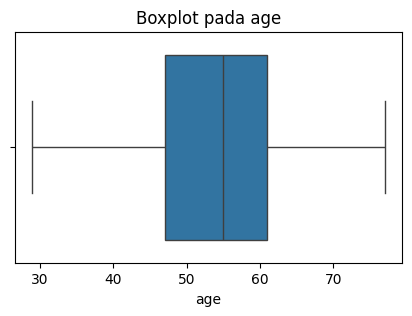

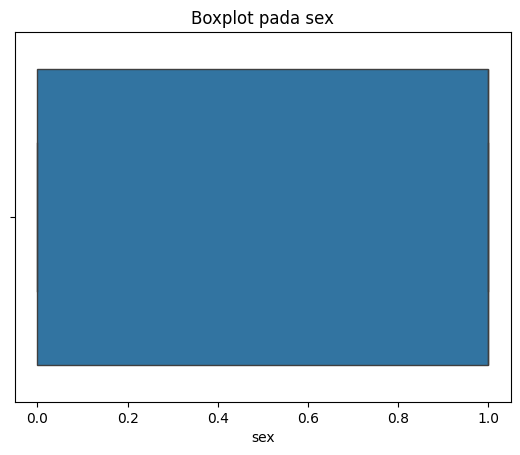

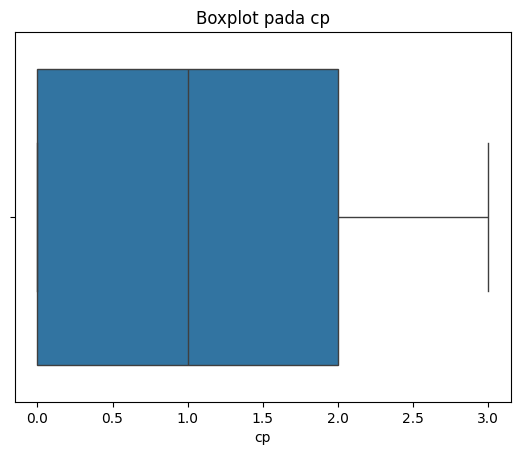

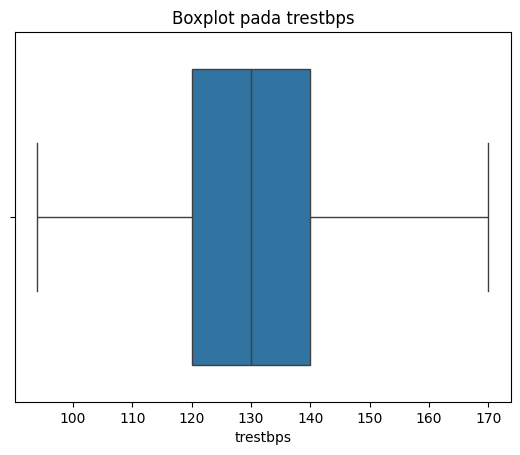

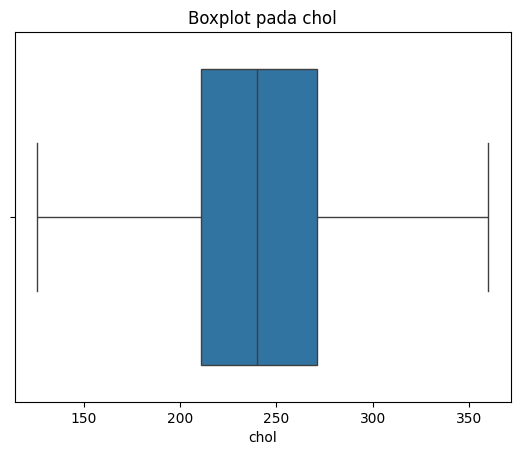

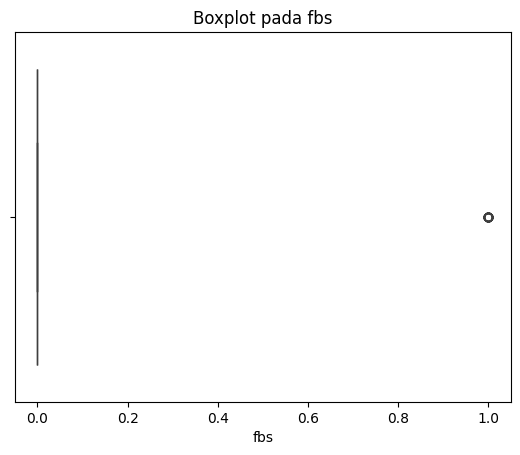

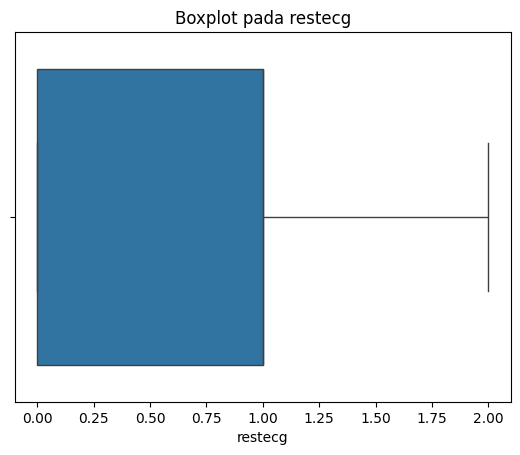

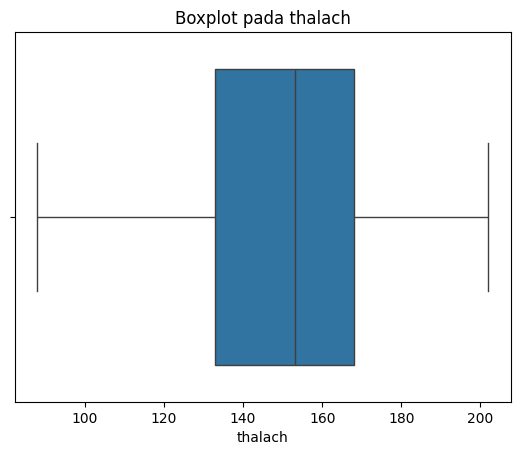

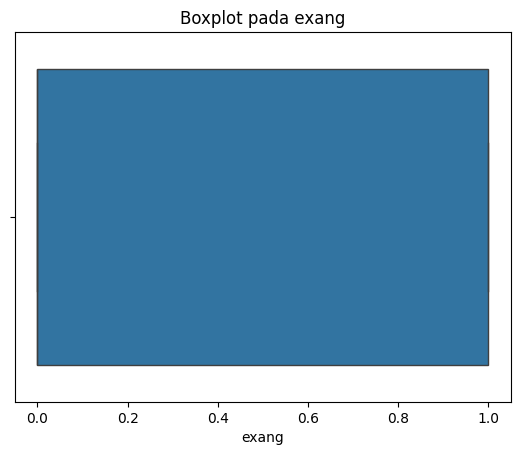

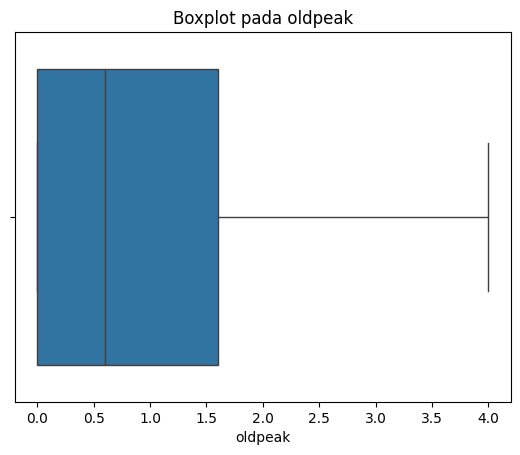

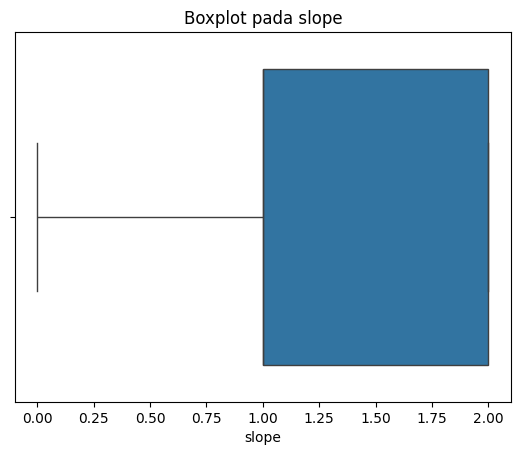

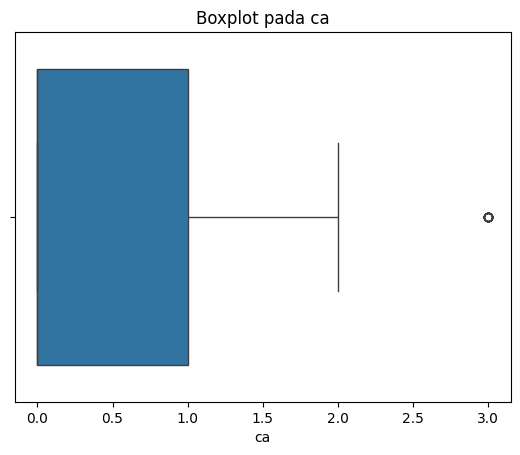

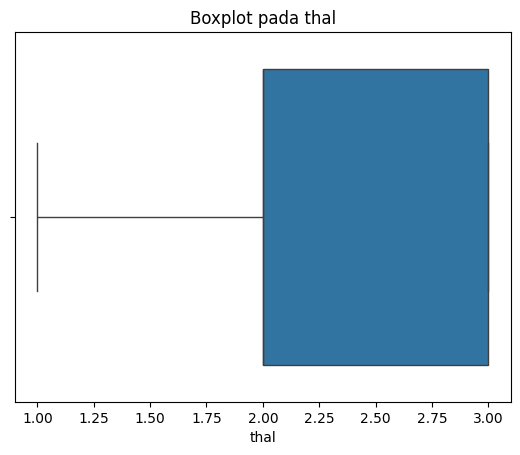

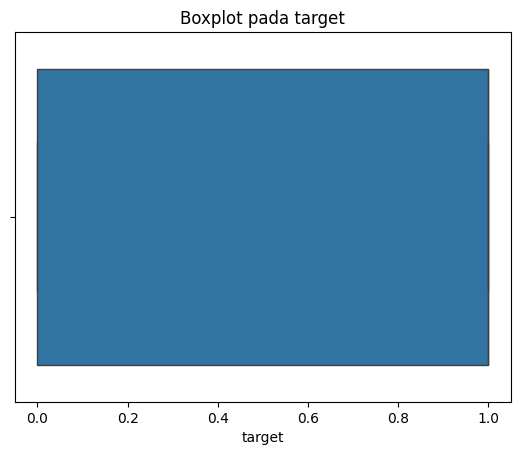

In [18]:
# Set ukuran gambar
plt.figure(figsize = (5, 3))

# Boxplot setelah penanganan outlier
for feature in numerical_features:
    sns.boxplot( x = df[feature], data = df)
    plt.title(f'Boxplot pada {feature}')
    plt.show()

Outlier pada kolom fbs tetap dibiarkan karena jika dihapus, maka nilai fbs = 1 akan hilang semua, sedangkan data tentang pasien yang memiliki kadar gula di atas 120 mg/dL (fbs = 1) masih dibutuhkan.

### **Memeriksa Imbalance Data pada Dataset**

In [19]:
df['target'].unique()

array([0, 1])

Diketahui bahwa pada kolom target terdapat hanya dua nilai, yaitu 0 dan 1 dengan keterangan:
0 = no disease
dan
1 = disease

In [20]:
df['target'].value_counts()

1    154
0    123
Name: target, dtype: int64

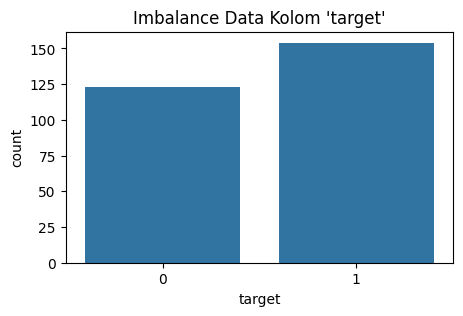

In [21]:
# Set ukuran gambar
plt.figure(figsize = (5, 3))

# Visualisasi Imbalance Data
sns.countplot(x = 'target', data = df)
plt.title('Imbalance Data Kolom \'target\'')
plt.show()

Dapat dilihat bahwa meskipun jumlahnya tidak sama, tetapi data cukup berimbang atau tidak terjadi imbalance data, sehingga tidak perlu diseimbangkan.

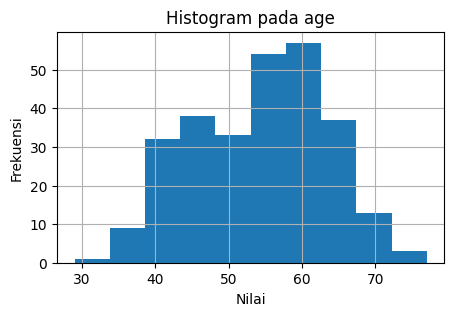

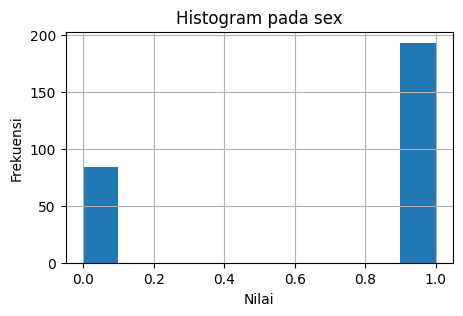

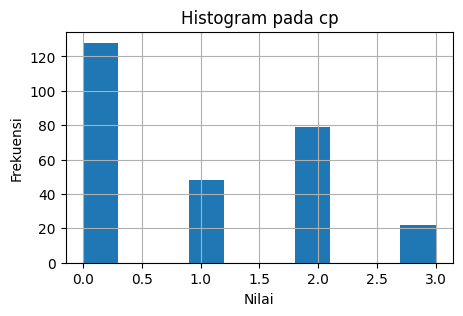

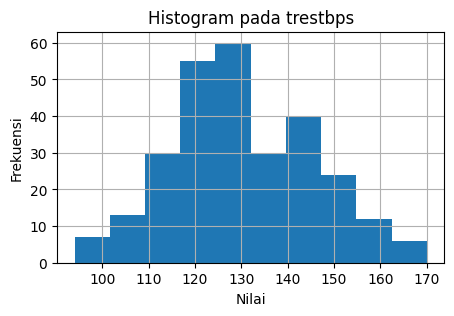

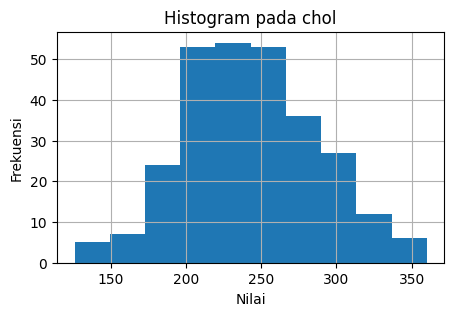

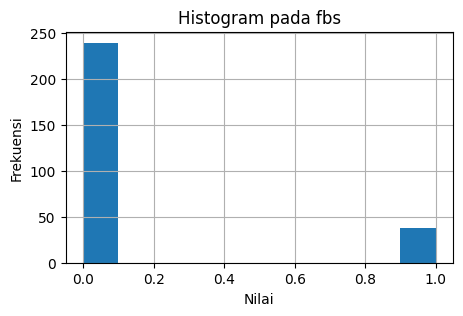

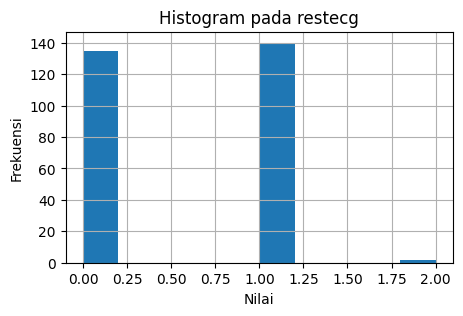

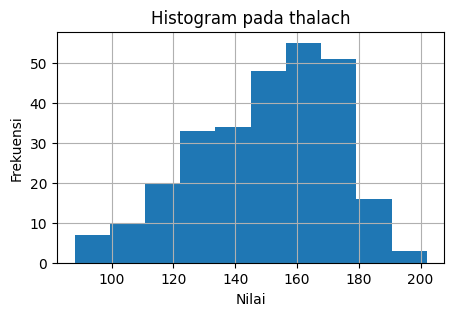

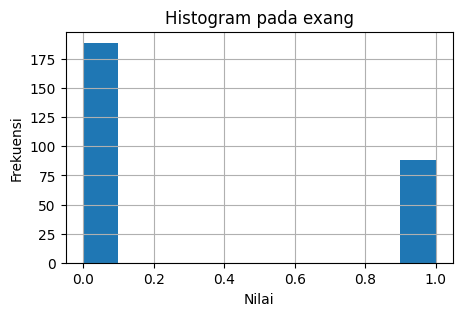

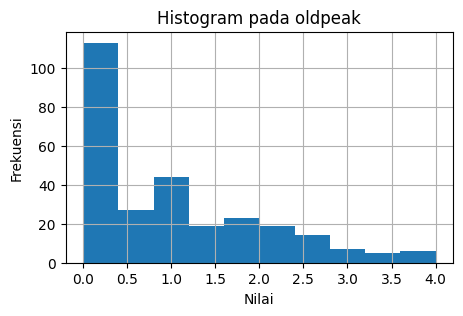

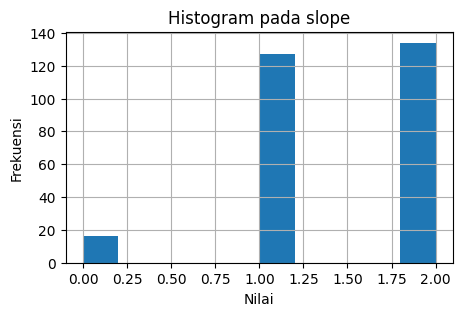

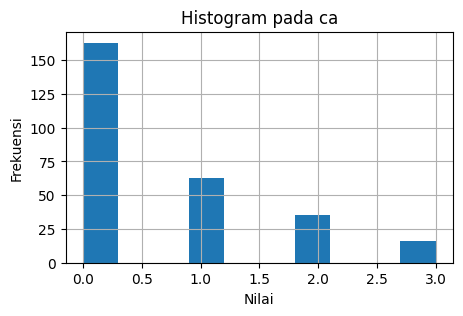

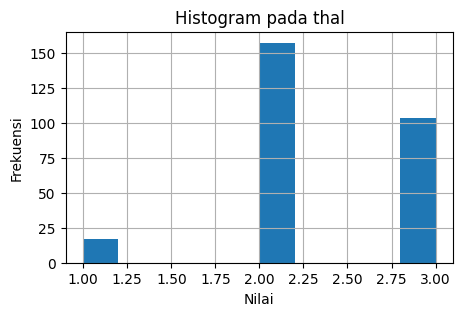

In [22]:
for feature in numerical_features:
    if feature == 'target':
        continue
    df[feature].hist(figsize = (5, 3), bins = 10)
    plt.title(f'Histogram pada {feature}')
    plt.xlabel('Nilai')
    plt.ylabel('Frekuensi')
    plt.show()

Selain kolom 'target', pada kolom lainnya terdapat imbalance data. Namun hal ini bisa diabaikan saja.

### **Feature Encoding**

In [23]:
# Memeriksa tipe data dari setiap kolom
data_types = df.dtypes

# Memeriksa kolom yang memiliki tipe data objek (string)
object_columns = data_types[data_types == 'object']

if len(object_columns) > 0:
    print("Perlu melakukan feature encoding karena terdapat kolom dengan tipe data objek.")
else:
    print("Tidak perlu melakukan feature encoding karena semua kolom sudah berupa data numerik.")

Tidak perlu melakukan feature encoding karena semua kolom sudah berupa data numerik.


Diketahui bahwa tidak diperlukan feature encoding pada dataset karena kolom-kolomnya sudah berupa data numerik, buka kategorikal.

## **Exploratory Data Analysis (EDA)**

### **Distinguish Attributes**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       277 non-null    int64  
 1   sex       277 non-null    int64  
 2   cp        277 non-null    int64  
 3   trestbps  277 non-null    int64  
 4   chol      277 non-null    int64  
 5   fbs       277 non-null    int64  
 6   restecg   277 non-null    int64  
 7   thalach   277 non-null    int64  
 8   exang     277 non-null    int64  
 9   oldpeak   277 non-null    float64
 10  slope     277 non-null    int64  
 11  ca        277 non-null    int64  
 12  thal      277 non-null    int64  
 13  target    277 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.5 KB


age = age in years

sex = (1 = male; 0 = female)

cp = chest pain type

trestbps = resting blood pressure (in mm Hg on admission to the hospital)

chol = serum cholestoral in mg/dl

fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg = resting electrocardiographic results

thalach = maximum heart rate achieved

exang = exercise induced angina (1 = yes; 0 = no)

oldpeak = ST depression induced by exercise relative to rest

slope = the slope of the peak exercise ST segment

ca = number of major vessels (0-3) colored by flourosopy

thal = (1 = normal; 2 = fixed defect; 3 = reversable defect)

target = (0 = no disease; 1 = disease)

Data-data sudah dalam bentuk data numerik, meskipun sebagian angka tersebut menggambarkan kategori atau kelas tertentu.

### **Mean, Median, Modus, dan Distribusi Data**

In [25]:
# Mean
df.mean()

age          54.151625
sex           0.696751
cp            0.981949
trestbps    129.848375
chol        242.924188
fbs           0.137184
restecg       0.519856
thalach     149.960289
exang         0.317690
oldpeak       0.967148
slope         1.425993
ca            0.653430
thal          2.310469
target        0.555957
dtype: float64

In [26]:
# Median
df.median()

age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.6
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [27]:
# Modus
df.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,1.0,0.0,120,197,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,58,NaN,NaN,130,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


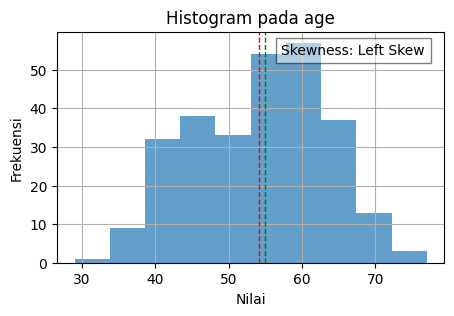

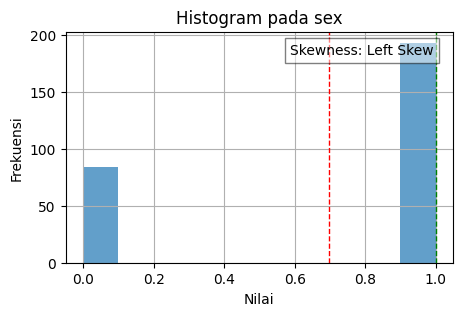

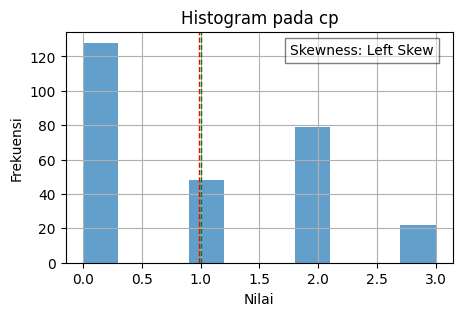

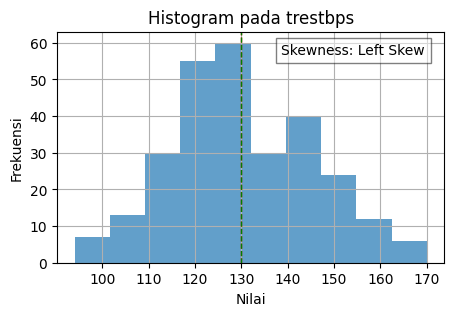

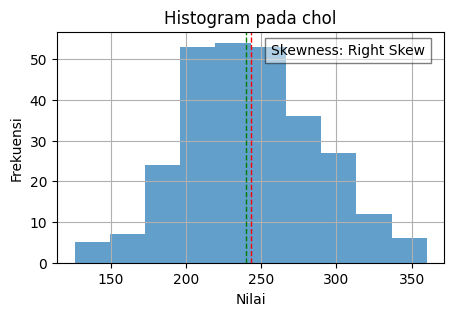

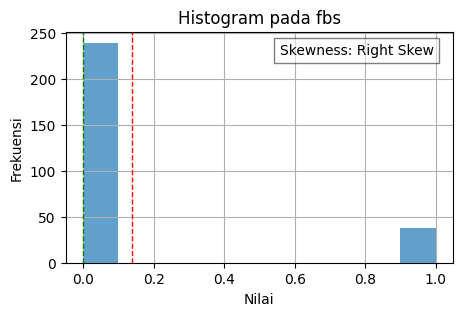

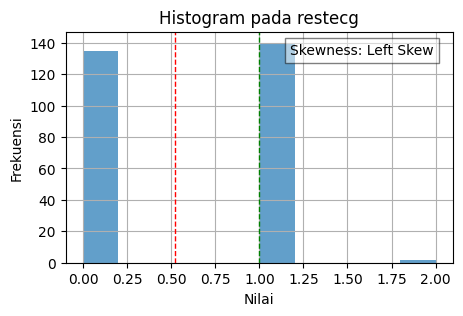

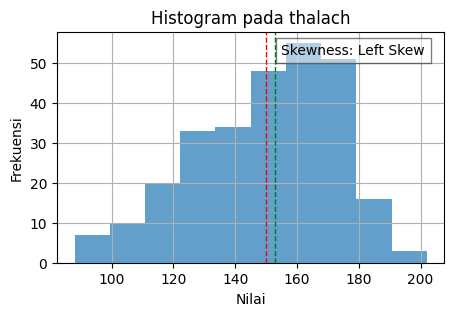

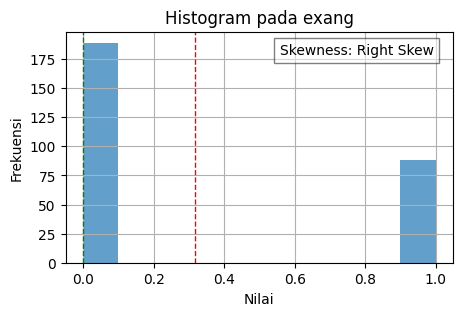

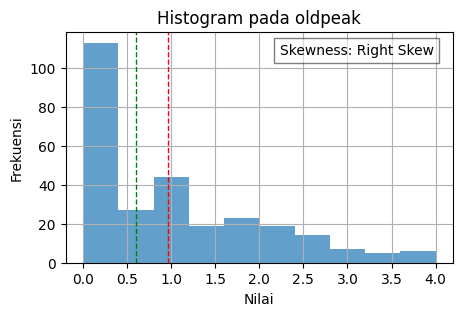

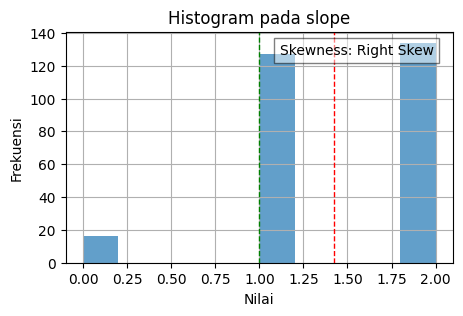

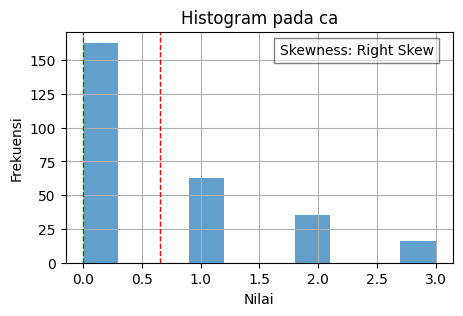

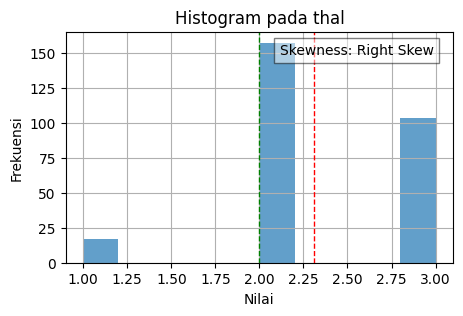

In [28]:
# Buat histogram dari masing-masing kolom untuk mengecek distribusi data
for feature in numerical_features:
    if feature == 'target':
        continue
    # Set ukuran gambar
    plt.figure(figsize = (5, 3))
    df[feature].hist(bins = 10, alpha = 0.7)
    # Tambahkan garis vertikal untuk mean
    plt.axvline(df[feature].mean(), color = 'red', linestyle = 'dashed', linewidth = 1)
    # Tambahkan garis vertikal untuk median
    plt.axvline(df[feature].median(), color = 'green', linestyle = 'dashed', linewidth = 1)
    plt.title(f'Histogram pada {feature}')
    plt.xlabel('Nilai')
    plt.ylabel('Frekuensi')

    # Tentukan skewness berdasarkan mean dan median
    if df[feature].mean() > df[feature].median():
        skewness = 'Right Skew'
    elif df[feature].mean() < df[feature].median():
        skewness = 'Left Skew'
    else:
        skewness = 'Symmetric'

    # Tambahkan teks skewness
    plt.text(0.95, 0.9, f'Skewness: {skewness}', transform=plt.gca().transAxes, ha = 'right', fontsize = 10, bbox = dict(facecolor = 'white', alpha = 0.5))

    plt.show()

Right skew (skewness positif) terjadi ketika ekor distribusi data panjang ke arah kanan, menunjukkan bahwa ada beberapa nilai yang jauh lebih besar dari sebagian besar nilai lainnya. Dalam distribusi right skew, *nilai mean akan cenderung lebih besar dari nilai median*, dan modus mungkin terletak di bagian kiri distribusi, di dekat nilai-nilai terendah. Sebaliknya, left skew (skewness negatif) terjadi ketika ekor distribusi data panjang ke arah kiri, menunjukkan adanya beberapa nilai yang jauh lebih kecil dari sebagian besar nilai lainnya. Dalam distribusi left skew, *nilai mean akan cenderung lebih kecil dari nilai median*, dan modus mungkin terletak di bagian kanan distribusi, di dekat nilai-nilai tertinggi. Di sisi lain, dalam distribusi yang simetris, tidak ada kecondongan yang jelas ke arah kanan atau kiri, sehingga ekor distribusi cenderung seimbang. Dalam hal ini, *nilai mean akan sama dengan nilai median*, dan modus akan berada di tengah distribusi, yang menunjukkan bahwa setiap sisi distribusi memiliki frekuensi yang sama.



1.   Mean Cocok digunakan ketika data memiliki distribusi simetris atau hampir simetris, karena rata-rata akan mencerminkan pusat massa data. Mean rentan terhadap pengaruh outlier, sehingga tidak cocok digunakan jika data memiliki outlier atau distribusi yang tidak simetris.
2.  Median lebih tahan terhadap outlier daripada mean, sehingga lebih cocok digunakan ketika data memiliki outlier atau distribusi yang tidak simetris. Median cocok digunakan untuk data yang tidak memiliki distribusi simetris, seperti data yang condong ke kiri (left-skewed) atau ke kanan (right-skewed).
3. Modus cocok digunakan untuk data kategorikal atau data berbentuk distribusi yang memiliki puncak yang jelas (bimodal atau multimodal).



### **Statistical Five Summaries**

In [29]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,277.0,54.151625,9.146479,29.0,47.0,55.0,61.0,77.0
sex,277.0,0.696751,0.460494,0.0,0.0,1.0,1.0,1.0
cp,277.0,0.981949,1.033689,0.0,0.0,1.0,2.0,3.0
trestbps,277.0,129.848375,15.534631,94.0,120.0,130.0,140.0,170.0
chol,277.0,242.924188,44.827342,126.0,211.0,240.0,271.0,360.0
fbs,277.0,0.137184,0.344664,0.0,0.0,0.0,0.0,1.0
restecg,277.0,0.519856,0.514784,0.0,0.0,1.0,1.0,2.0
thalach,277.0,149.960289,22.759658,88.0,133.0,153.0,168.0,202.0
exang,277.0,0.317690,0.466421,0.0,0.0,0.0,1.0,1.0
oldpeak,277.0,0.967148,1.030813,0.0,0.0,0.6,1.6,4.0


Dapat dilihat hasil statistical five summaries dari setiap kolom pada dataset.

## **Feature Engineering**

In [30]:
# Melihat korelasi antarkolom
korelasi = df.corr()
korelasi

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.058722,-0.057192,0.290222,0.163959,0.120952,-0.111450,-0.412188,0.099076,0.202550,-0.146881,0.389694,0.054479,-0.227089
sex,-0.058722,1.000000,-0.087657,0.005198,-0.121348,0.057606,-0.096781,-0.055774,0.180261,0.162125,-0.055191,0.128677,0.244662,-0.320876
cp,-0.057192,-0.087657,1.000000,0.080831,-0.075171,0.108672,0.078978,0.289037,-0.378838,-0.117190,0.082391,-0.203037,-0.183556,0.406872
trestbps,0.290222,0.005198,0.080831,1.000000,0.118516,0.131118,-0.142792,-0.076454,0.003172,0.148500,-0.087729,0.103363,-0.012420,-0.118852
chol,0.163959,-0.121348,-0.075171,0.118516,1.000000,0.015918,-0.135354,-0.016413,0.074457,-0.018802,0.045439,0.116551,0.075141,-0.100728
fbs,0.120952,0.057606,0.108672,0.131118,0.015918,1.000000,-0.076670,-0.023783,-0.024165,0.017830,-0.055746,0.163624,-0.050586,-0.002668
restecg,-0.111450,-0.096781,0.078978,-0.142792,-0.135354,-0.076670,1.000000,0.078151,-0.101816,-0.089236,0.113069,-0.124428,0.039856,0.168862
thalach,-0.412188,-0.055774,0.289037,-0.076454,-0.016413,-0.023783,0.078151,1.000000,-0.394725,-0.346499,0.380472,-0.300396,-0.132955,0.429876
exang,0.099076,0.180261,-0.378838,0.003172,0.074457,-0.024165,-0.101816,-0.394725,1.000000,0.320206,-0.251827,0.157847,0.222838,-0.420182
oldpeak,0.202550,0.162125,-0.117190,0.148500,-0.018802,0.017830,-0.089236,-0.346499,0.320206,1.000000,-0.526383,0.237633,0.192397,-0.433860


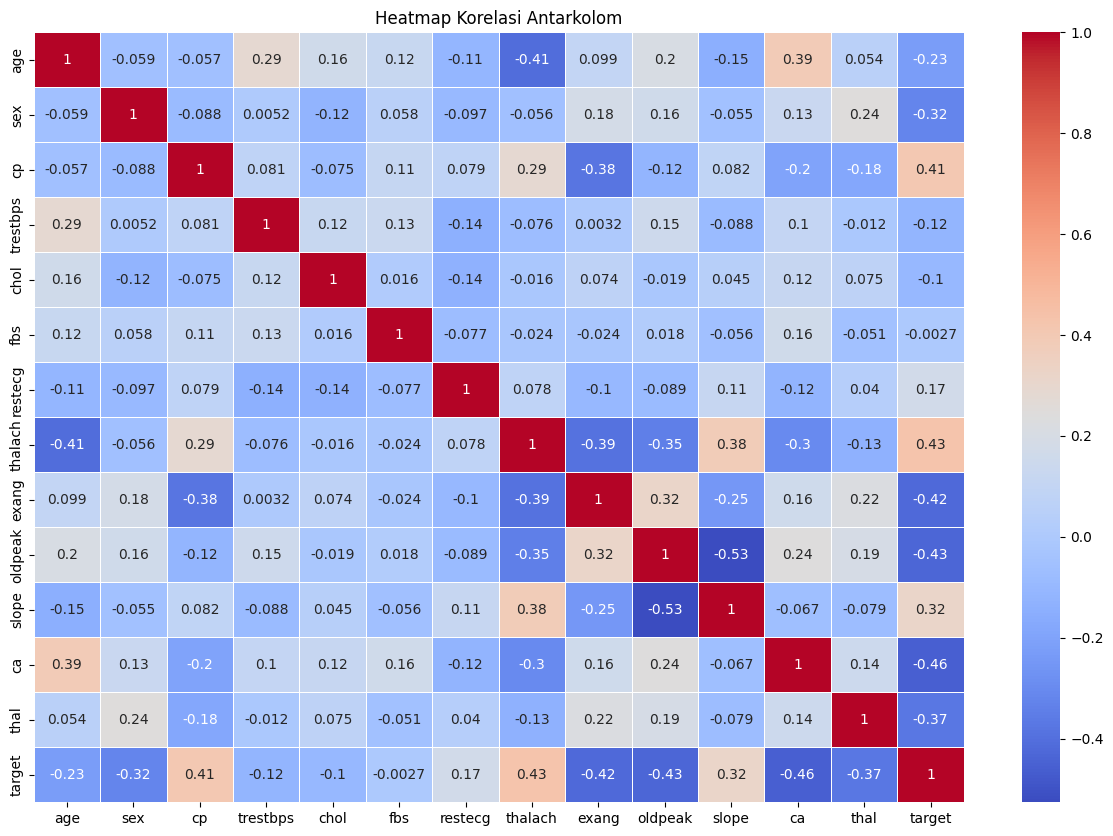

In [31]:
# Visualisasi korelasi antarkolom
plt.figure(figsize = (15, 10))
sns.heatmap(korelasi, annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title('Heatmap Korelasi Antarkolom')
plt.show()

In [32]:
# Menghitung korelasi antara kolom lain dengan kolom target
korelasi_target = korelasi['target'].sort_values()
korelasi_target

ca         -0.460788
oldpeak    -0.433860
exang      -0.420182
thal       -0.373235
sex        -0.320876
age        -0.227089
trestbps   -0.118852
chol       -0.100728
fbs        -0.002668
restecg     0.168862
slope       0.319642
cp          0.406872
thalach     0.429876
target      1.000000
Name: target, dtype: float64

1. Nilai korelasi positif yang mendekati 1 menunjukkan hubungan positif yang kuat antara fitur dan target. Artinya, semakin tinggi nilai fitur, semakin tinggi kemungkinan targetnya juga tinggi.

2. Nilai korelasi negatif yang mendekati -1 menunjukkan hubungan negatif yang kuat antara fitur dan target. Artinya, semakin tinggi nilai fitur, semakin rendah kemungkinan targetnya.

3. Nilai korelasi mendekati 0 menunjukkan bahwa tidak ada hubungan linear yang jelas antara fitur dan target.

In [33]:
# Menghitung korelasi antara kolom lain dengan kolom target
korelasi_target_filtered = korelasi_target.loc[(korelasi_target.abs() > 0.35) | (korelasi_target.abs() < -0.35)]

# Menampilkan hasil korelasi yang telah difilter
print("Korelasi antara kolom lain dengan kolom target yang memiliki nilai lebih dari 0.35 atau kurang dari -0.35:")
print(korelasi_target_filtered)

Korelasi antara kolom lain dengan kolom target yang memiliki nilai lebih dari 0.35 atau kurang dari -0.35:
ca        -0.460788
oldpeak   -0.433860
exang     -0.420182
thal      -0.373235
cp         0.406872
thalach    0.429876
target     1.000000
Name: target, dtype: float64


Kolom yang akan dianalisa lebih lanjut hanyalah kolom yang memiliki nilai korelasi dengan target lebih dari 0.35 atau kurang dari -0.35

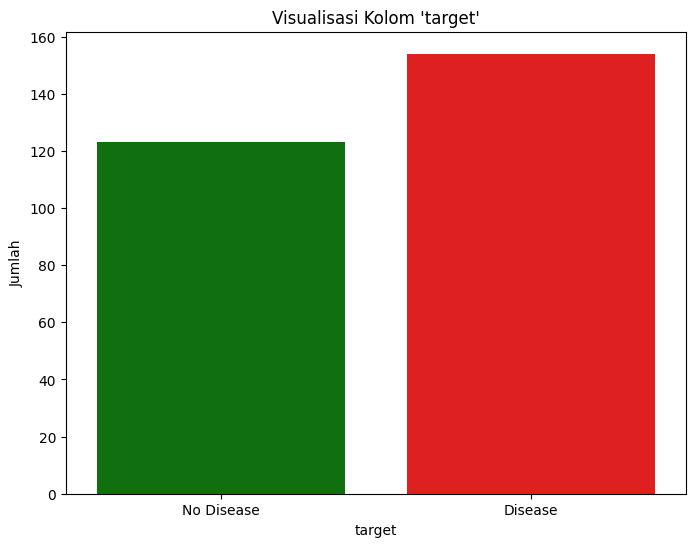

In [34]:
# Menghitung jumlah pengguna dengan penyakit dan tanpa penyakit
disease = df[df['target'] == 1]['target'].count()
no_disease = df[df['target'] == 0]['target'].count()

# Plot
plt.figure(figsize = (8, 6))
sns.countplot(x = 'target', hue = 'target', data = df, palette = {0: 'green', 1: 'red'}, legend = False)

# Menambahkan label dan judul
plt.xticks(ticks = [0, 1], labels = ['No Disease', 'Disease'])
plt.ylabel('Jumlah')
plt.title('Visualisasi Kolom \'target\'')

# Menampilkan plot
plt.show()

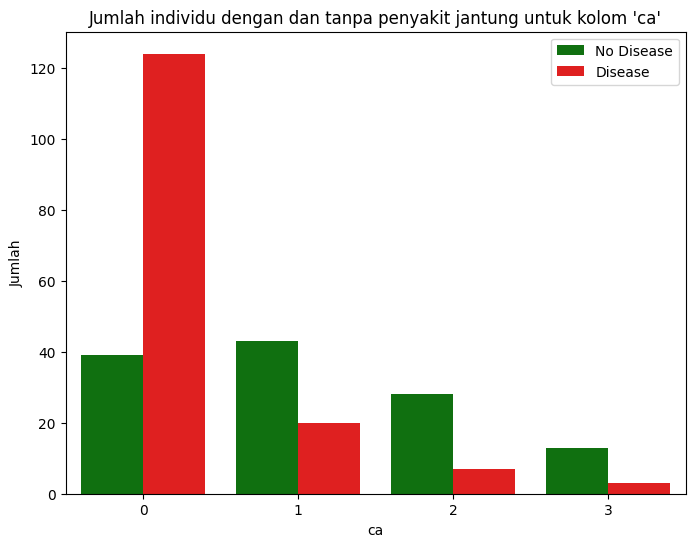

In [35]:
# Visualisasi untuk korelasi kolom 'target' dan kolom 'ca'
plt.figure(figsize = (8, 6))
sns.countplot(x = 'ca', hue = 'target', data = df, palette = {0: 'green', 1: 'red'})
plt.title('Jumlah individu dengan dan tanpa penyakit jantung untuk kolom \'ca\'')
plt.xlabel('ca')
plt.ylabel('Jumlah')
plt.legend(['No Disease', 'Disease'])
plt.show()

Dapat dilihat bahwa semakin kecil nilai ca, semakin mungkin untuk memiliki target disease.

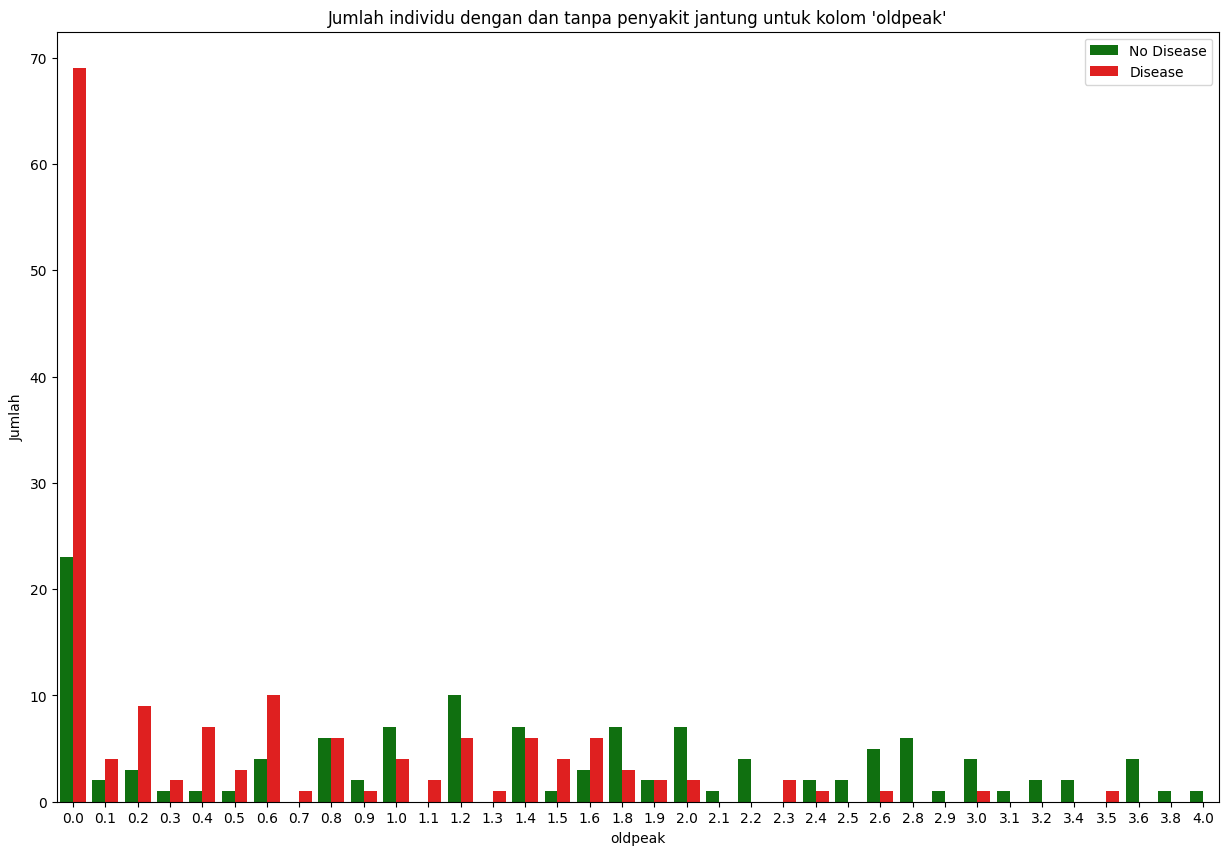

In [36]:
# Visualisasi untuk korelasi kolom 'target' dan kolom 'oldpeak'
plt.figure(figsize = (15, 10))
sns.countplot(x = 'oldpeak', hue = 'target', data = df, palette = {0: 'green', 1: 'red'})
plt.title('Jumlah individu dengan dan tanpa penyakit jantung untuk kolom \'oldpeak\'')
plt.xlabel('oldpeak')
plt.ylabel('Jumlah')
plt.legend(['No Disease', 'Disease'])
plt.show()

Dapat dilihat bahwa semakin kecil nilai oldpeak, semakin mungkin untuk memiliki target disease.

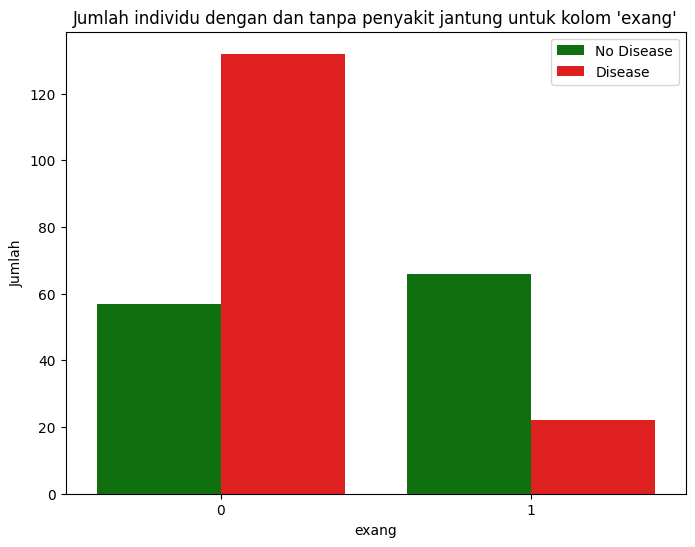

In [37]:
# Visualisasi untuk korelasi kolom 'target' dan kolom 'exang'
plt.figure(figsize = (8, 6))
sns.countplot(x = 'exang', hue = 'target', data = df, palette = {0: 'green', 1: 'red'})
plt.title('Jumlah individu dengan dan tanpa penyakit jantung untuk kolom \'exang\'')
plt.xlabel('exang')
plt.ylabel('Jumlah')
plt.legend(['No Disease', 'Disease'])
plt.show()

Dapat dilihat bahwa o 'exang' (0) lebih mungkin untuk memiliki target disease

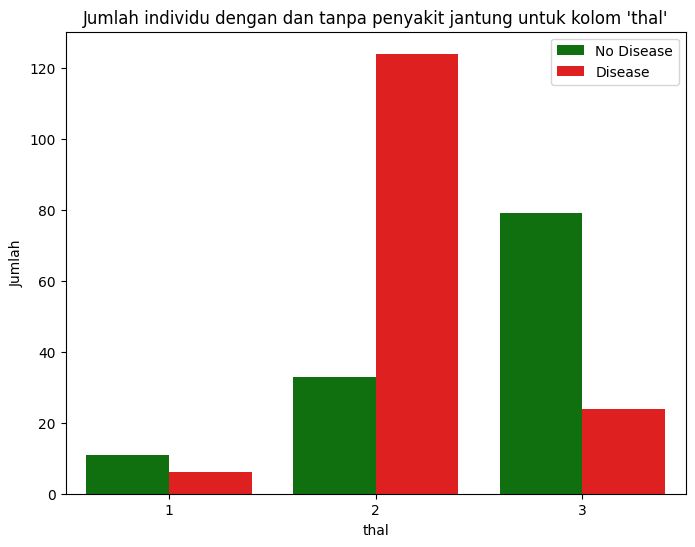

In [38]:
# Visualisasi untuk korelasi kolom 'target' dan kolom 'thal'
plt.figure(figsize = (8, 6))
sns.countplot(x = 'thal', hue = 'target', data = df, palette = {0: 'green', 1: 'red'})
plt.title('Jumlah individu dengan dan tanpa penyakit jantung untuk kolom \'thal\'')
plt.xlabel('thal')
plt.ylabel('Jumlah')
plt.legend(['No Disease', 'Disease'])
plt.show()

Thal yang tidak normal (2 dan 3) lebih mungkin untuk memiliki target disease

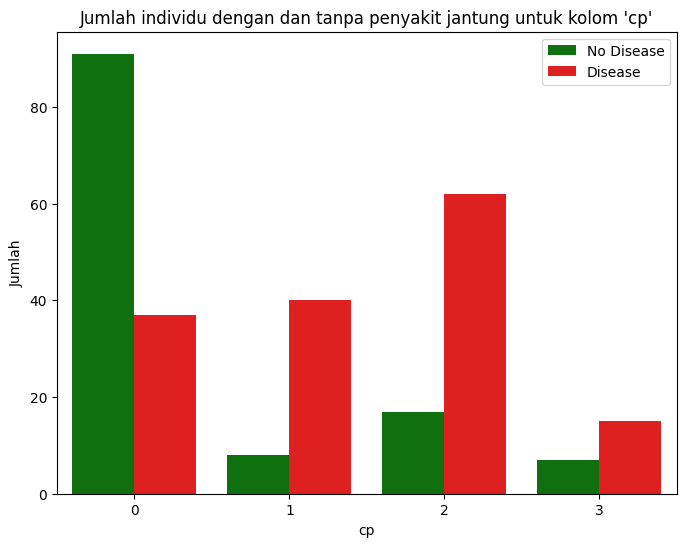

In [39]:
# Visualisasi untuk korelasi kolom 'target' dan kolom 'cp'
plt.figure(figsize = (8, 6))
sns.countplot(x = 'cp', hue = 'target', data = df, palette = {0: 'green', 1: 'red'})
plt.title('Jumlah individu dengan dan tanpa penyakit jantung untuk kolom \'cp\'')
plt.xlabel('cp')
plt.ylabel('Jumlah')
plt.legend(['No Disease', 'Disease'])
plt.show()

Dapat dilihat bahwa pada cp yang nilainya 1, 2, dan 3 lebih banyak disease nya ketimbang no disease.

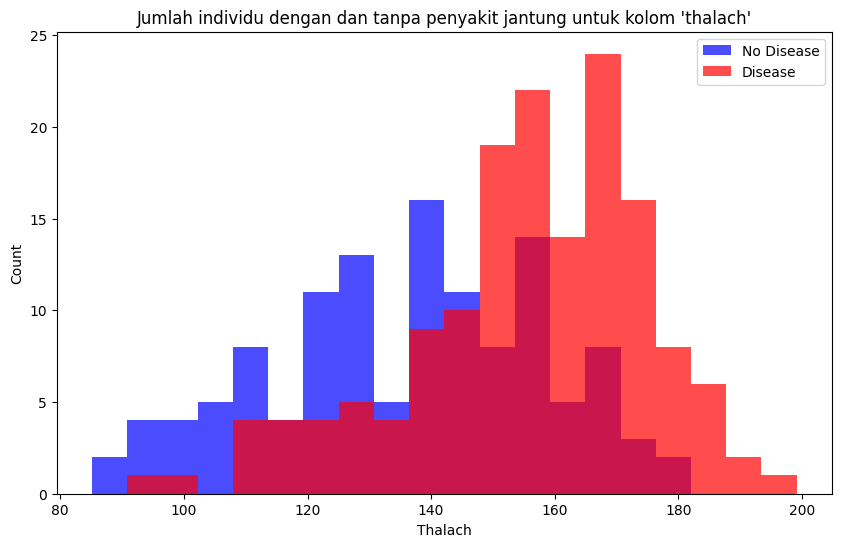

In [40]:
# Tentukan jumlah interval dan rentang nilai thalach
num_bins = 20
thalach_min = df['thalach'].min()
thalach_max = df['thalach'].max()

# Buat interval
bins = np.linspace(thalach_min, thalach_max, num_bins + 1)

# Hitung jumlah individu dengan dan tanpa penyakit jantung di setiap interval
thalach_counts_no_disease, _ = np.histogram(df[df['target'] == 0]['thalach'], bins = bins)
thalach_counts_disease, _ = np.histogram(df[df['target'] == 1]['thalach'], bins = bins)

# Plot histogram
plt.figure(figsize = (10, 6))
plt.bar(bins[:-1], thalach_counts_no_disease, width = (thalach_max - thalach_min) / num_bins, color = 'blue', alpha = 0.7, label = 'No Disease')
plt.bar(bins[:-1], thalach_counts_disease, width = (thalach_max - thalach_min) / num_bins, color = 'red', alpha=0.7, label = 'Disease')
plt.title('Jumlah individu dengan dan tanpa penyakit jantung untuk kolom \'thalach\'')
plt.xlabel('Thalach')
plt.ylabel('Count')
plt.legend()
plt.show()

Dapat dilihat bahwa nilai thalach (maksimum denyut jantung yang dicapai) yang berada dalam rentang 150 hingga 200 cenderung terkait dengan penyakit jantung (disease).

Sekarang kita ingin melihat bagaimana korelasi gender dan usia terhadap target.

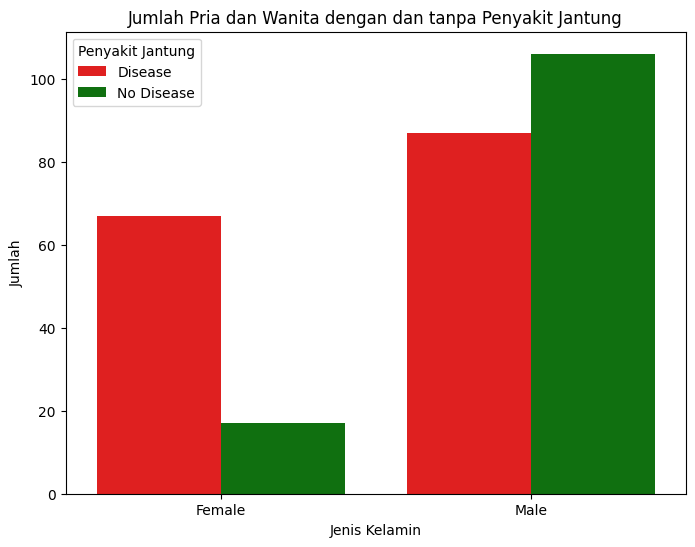

In [41]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'sex', hue = 'target', data = df, palette = {0: 'green', 1: 'red'}, hue_order = [1, 0])

# Menambahkan label dan judul
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.title('Jumlah Pria dan Wanita dengan dan tanpa Penyakit Jantung')

# Mengatur label di sumbu x
plt.xticks(ticks = [0, 1], labels = ['Female', 'Male'])

# Menampilkan legenda
plt.legend(title = 'Penyakit Jantung', labels = ['Disease', 'No Disease'])

# Menampilkan plot
plt.show()

Dapat dilihat bahwa dalam dataset ini, jumlah pria yang memiliki penyakit jantung lebih tinggi daripada jumlah wanita, sementara jumlah wanita yang tidak memiliki penyakit jantung jauh lebih rendah daripada jumlah pria. Ini menunjukkan bahwa jenis kelamin dapat mempengaruhi kecenderungan terjadinya penyakit jantung.

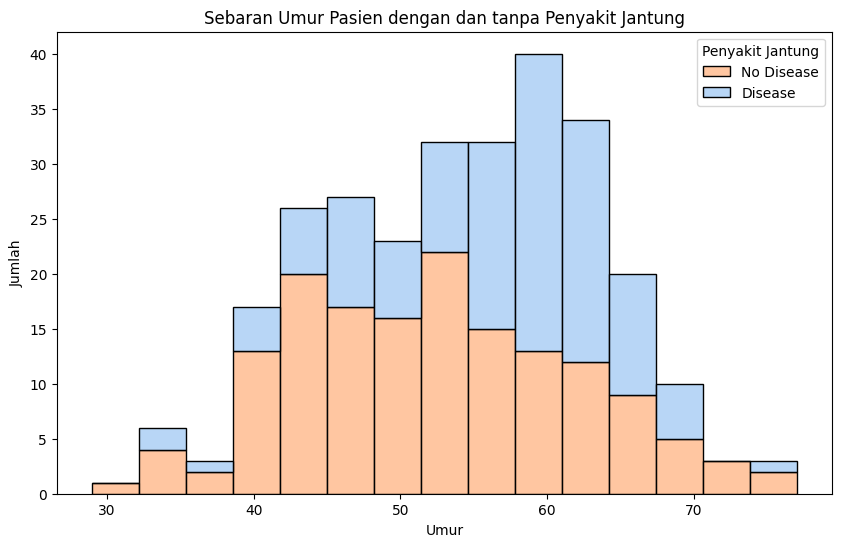

In [42]:
# Filter data berdasarkan rentang umur
filtered_data = df[(df['age'] >= 29) & (df['age'] <= 77)]

# Plot
plt.figure(figsize = (10, 6))
sns.histplot(data = filtered_data, x = 'age', hue = 'target', bins = 15, palette = 'pastel', multiple = 'stack')

# Menambahkan label dan judul
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.title('Sebaran Umur Pasien dengan dan tanpa Penyakit Jantung')

# Menampilkan legenda
plt.legend(title='Penyakit Jantung', labels=['No Disease', 'Disease'])

# Menampilkan plot
plt.show()

Dapat dilihat bahwa seseorang yang berada dalam rentang umur 38 - 60 tahun memiliki peluang yang cukup tinggi untuk terkena heart disease.

### **Membuat Fitur-fitur Baru**

In [43]:
# Salin dataframe awal ke dalam dataframe baru
df_added = df.copy()
df_added.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       277 non-null    int64  
 1   sex       277 non-null    int64  
 2   cp        277 non-null    int64  
 3   trestbps  277 non-null    int64  
 4   chol      277 non-null    int64  
 5   fbs       277 non-null    int64  
 6   restecg   277 non-null    int64  
 7   thalach   277 non-null    int64  
 8   exang     277 non-null    int64  
 9   oldpeak   277 non-null    float64
 10  slope     277 non-null    int64  
 11  ca        277 non-null    int64  
 12  thal      277 non-null    int64  
 13  target    277 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.5 KB


1. Fitur Rasio Cholesterol terhadap Tekanan Darah

Fitur "Rasio Cholesterol terhadap Tekanan Darah" adalah sebuah indikator yang mengevaluasi hubungan antara kadar kolesterol dalam darah dan tekanan darah sistolik pada saat pasien masuk ke rumah sakit. Semakin tinggi nilai rasio, semakin tinggi risiko seseorang terkena penyakit jantung. Fitur ini membantu dalam mengidentifikasi individu yang berisiko tinggi terkena penyakit jantung berdasarkan data kolesterol dan tekanan darah mereka.

In [44]:
# Menambahkan Fitur Rasio Cholesterol terhadap Tekanan Darah
df_added['chol_trestbps_ratio'] = df_added['chol'] / df_added['trestbps']
df_added

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_trestbps_ratio
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1.696000
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1.450000
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1.200000
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1.371622
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2.130435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,1.758333
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,1.305556
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,1.992188
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,1.706250


2. Fitur Indeks Jantung

Fitur "Indeks Jantung" adalah sebuah nilai atau skor yang mencerminkan kondisi keseluruhan jantung seseorang. Tujuannya adalah untuk memberikan gambaran komprehensif tentang risiko seseorang terkena penyakit jantung. Dengan memperhitungkan beberapa faktor risiko sekaligus, fitur ini membantu dalam mengevaluasi dan merencanakan tindakan pencegahan atau pengelolaan penyakit jantung. Semakin tinggi nilai atau skor dari fitur "Indeks Jantung", semakin tinggi risiko seseorang terkena penyakit jantung. Sebaliknya, semakin rendah nilai atau skornya, semakin rendah risiko tersebut.

In [45]:
# Menambahkan Fitur Indeks Jantung
df_added['heart_index'] = df_added['thalach'] / (df_added['age'] * (220 - df_added['age']))
df_added

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_trestbps_ratio,heart_index
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1.696000,0.019231
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1.450000,0.017512
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1.200000,0.011905
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1.371622,0.016600
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2.130435,0.010821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,1.758333,0.011126
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,1.305556,0.022598
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,1.992188,0.018429
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,1.706250,0.013159


3. Fitur Tingkat Kolesterol Keseluruhan

Fitur "Tingkat Kolesterol Keseluruhan" adalah kombinasi dari tingkat kolesterol total dan tekanan darah istirahat. Ini memberikan gambaran komprehensif tentang risiko kesehatan jantung seseorang dengan menggabungkan dua faktor risiko utama. Semakin tinggi nilai fitur ini, semakin tinggi risiko terkena penyakit jantung.

In [46]:
# Menambahkan fitur Tingkat Kolesterol Keseluruhan
df_added['total_cholesterol'] = df_added['chol'] + df_added['trestbps']
df_added

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_trestbps_ratio,heart_index,total_cholesterol
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1.696000,0.019231,337
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1.450000,0.017512,343
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1.200000,0.011905,319
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1.371622,0.016600,351
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2.130435,0.010821,432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,1.758333,0.011126,331
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,1.305556,0.022598,249
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,1.992188,0.018429,383
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,1.706250,0.013159,433


4. Fitur Risiko Kesehatan Jantung

Fitur "Risiko Kesehatan Jantung" adalah sebuah metrik yang menggambarkan tingkat risiko seseorang terhadap penyakit jantung berdasarkan faktor-faktor seperti usia, jenis kelamin, tekanan darah, kadar kolesterol, detak jantung maksimum, riwayat penyakit jantung dalam keluarga, dan faktor gaya hidup lainnya. Nilai yang lebih tinggi menunjukkan risiko yang lebih tinggi terhadap penyakit jantung, sementara nilai yang lebih rendah menunjukkan risiko yang lebih rendah. Fitur ini membantu dalam memahami seberapa besar risiko seseorang terkena penyakit jantung dan dapat digunakan untuk mengambil langkah-langkah pencegahan yang sesuai.

In [47]:
# Menambahkan fitur Risiko Kesehatan Jantung
df_added['heart_disease_risk'] = (df_added['age'] * df_added['chol']) / (df_added['thalach'] * df_added['trestbps'])
df_added

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_trestbps_ratio,heart_index,total_cholesterol,heart_disease_risk
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1.696000,0.019231,337,0.524952
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1.450000,0.017512,343,0.495806
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1.200000,0.011905,319,0.672000
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1.371622,0.016600,351,0.519683
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2.130435,0.010821,432,1.246103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,1.758333,0.011126,331,1.039710
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,1.305556,0.022598,249,0.328254
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,1.992188,0.018429,383,0.643439
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,1.706250,0.013159,433,0.805350


5. Fitur Sex Label

Fitur "sex_label" adalah representasi kategori jenis kelamin dalam dataset. Nilai 1 menunjukkan jenis kelamin laki-laki (male), sedangkan nilai 0 menunjukkan jenis kelamin perempuan (female). Fitur ini biasanya digunakan untuk menandai atau mengkodekan jenis kelamin dalam bentuk yang lebih mudah diinterpretasikan oleh algoritma pembelajaran mesin. Dengan menggunakan label seperti ini, model dapat dengan mudah memahami perbedaan antara jenis kelamin dalam analisis data. Misalnya, ketika model memprediksi risiko penyakit jantung, fitur ini dapat membantu model memahami bagaimana risiko berbeda antara laki-laki dan perempuan.

In [48]:
# Dictionary untuk mapping nilai
sex_mapping = {1: 'male', 0: 'female'}

# Menambah kolom baru dengan keterangan
df_added['sex_label'] = df_added['sex'].map(sex_mapping)

# Mendapatkan indeks kolom "sex"
sex_index = df_added.columns.get_loc('sex')

# Menyisipkan kolom baru setelah kolom "sex"
df_added.insert(sex_index + 1, 'sex_label', df_added.pop('sex_label'))

df_added

,age,sex,sex_label,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,chol_trestbps_ratio,heart_index,total_cholesterol,heart_disease_risk
0,52,1,male,0,125,212,0,1,168,0,1.0,2,2,3,0,1.696000,0.019231,337,0.524952
1,53,1,male,0,140,203,1,0,155,1,3.1,0,0,3,0,1.450000,0.017512,343,0.495806
2,70,1,male,0,145,174,0,1,125,1,2.6,0,0,3,0,1.200000,0.011905,319,0.672000
3,61,1,male,0,148,203,0,1,161,0,0.0,2,1,3,0,1.371622,0.016600,351,0.519683
4,62,0,female,0,138,294,1,1,106,0,1.9,1,3,2,0,2.130435,0.010821,432,1.246103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,female,2,120,211,0,0,115,0,1.5,1,0,2,1,1.758333,0.011126,331,1.039710
733,44,0,female,2,108,141,0,1,175,0,0.6,1,0,2,1,1.305556,0.022598,249,0.328254
739,52,1,male,0,128,255,0,1,161,1,0.0,2,1,3,0,1.992188,0.018429,383,0.643439
843,59,1,male,3,160,273,0,0,125,0,0.0,2,0,2,0,1.706250,0.013159,433,0.805350


6. Fitur Exang Label

Fitur "exang_label" adalah representasi label dari kolom "exang" yang menunjukkan apakah terjadi angina yang diinduksi oleh latihan atau tidak. Nilai 1 dalam kolom "exang" menandakan adanya angina yang diinduksi oleh latihan, sedangkan nilai 0 menandakan tidak adanya angina yang diinduksi oleh latihan. Dengan demikian, "exang_label" adalah interpretasi yang lebih mudah dimengerti dari nilai-nilai tersebut, di mana nilai "yes" menunjukkan adanya angina yang diinduksi oleh latihan, sementara "no" menunjukkan tidak adanya angina yang diinduksi oleh latihan. Dengan menggunakan label ini, interpretasi hasil analisis menjadi lebih intuitif dan mudah dipahami.

In [49]:
# Dictionary untuk mapping nilai
exang_mapping = {1: 'yes', 0: 'no'}

# Menambah kolom baru dengan keterangan
df_added['exang_label'] = df_added['exang'].map(exang_mapping)

# Mendapatkan indeks kolom "exang"
exang_index = df_added.columns.get_loc('exang')

# Menyisipkan kolom baru setelah kolom "exang"
df_added.insert(exang_index + 1, 'exang_label', df_added.pop('exang_label'))

df_added

,age,sex,sex_label,cp,trestbps,chol,fbs,restecg,thalach,exang,exang_label,oldpeak,slope,ca,thal,target,chol_trestbps_ratio,heart_index,total_cholesterol,heart_disease_risk
0,52,1,male,0,125,212,0,1,168,0,no,1.0,2,2,3,0,1.696000,0.019231,337,0.524952
1,53,1,male,0,140,203,1,0,155,1,yes,3.1,0,0,3,0,1.450000,0.017512,343,0.495806
2,70,1,male,0,145,174,0,1,125,1,yes,2.6,0,0,3,0,1.200000,0.011905,319,0.672000
3,61,1,male,0,148,203,0,1,161,0,no,0.0,2,1,3,0,1.371622,0.016600,351,0.519683
4,62,0,female,0,138,294,1,1,106,0,no,1.9,1,3,2,0,2.130435,0.010821,432,1.246103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,female,2,120,211,0,0,115,0,no,1.5,1,0,2,1,1.758333,0.011126,331,1.039710
733,44,0,female,2,108,141,0,1,175,0,no,0.6,1,0,2,1,1.305556,0.022598,249,0.328254
739,52,1,male,0,128,255,0,1,161,1,yes,0.0,2,1,3,0,1.992188,0.018429,383,0.643439
843,59,1,male,3,160,273,0,0,125,0,no,0.0,2,0,2,0,1.706250,0.013159,433,0.805350


7. Fitur Thal Label

Fitur "thal_label" adalah representasi label dari kolom "thal", yang mengindikasikan jenis kelainan yang terdeteksi dalam hasil tes thallium. Nilai 1 dalam kolom "thal" menandakan hasil tes yang normal, nilai 2 menunjukkan adanya kelainan tetap (fixed defect), dan nilai 3 menunjukkan adanya kelainan yang dapat dipulihkan (reversible defect). Dengan menggunakan label ini, informasi tentang hasil tes thallium dapat lebih mudah dipahami. Misalnya, "normal" menandakan hasil tes normal, "fixed defect" menunjukkan adanya kelainan tetap, dan "reversible defect" menunjukkan adanya kelainan yang dapat dipulihkan. Ini membantu dalam menafsirkan hasil tes dengan cara yang lebih intuitif dan mudah dipahami.

In [50]:
# Dictionary untuk mapping nilai
thal_mapping = {1: 'normal', 2: 'fixed defect', 3: 'reversible defect'}

# Menambah kolom baru dengan keterangan
df_added['thal_label'] = df_added['thal'].map(thal_mapping)

# Mendapatkan indeks kolom "thal"
thal_index = df_added.columns.get_loc('thal')

# Menyisipkan kolom baru setelah kolom "thal"
df_added.insert(thal_index + 1, 'thal_label', df_added.pop('thal_label'))

df_added

,age,sex,sex_label,cp,trestbps,chol,fbs,restecg,thalach,exang,...,oldpeak,slope,ca,thal,thal_label,target,chol_trestbps_ratio,heart_index,total_cholesterol,heart_disease_risk
0,52,1,male,0,125,212,0,1,168,0,...,1.0,2,2,3,reversible defect,0,1.696000,0.019231,337,0.524952
1,53,1,male,0,140,203,1,0,155,1,...,3.1,0,0,3,reversible defect,0,1.450000,0.017512,343,0.495806
2,70,1,male,0,145,174,0,1,125,1,...,2.6,0,0,3,reversible defect,0,1.200000,0.011905,319,0.672000
3,61,1,male,0,148,203,0,1,161,0,...,0.0,2,1,3,reversible defect,0,1.371622,0.016600,351,0.519683
4,62,0,female,0,138,294,1,1,106,0,...,1.9,1,3,2,fixed defect,0,2.130435,0.010821,432,1.246103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,female,2,120,211,0,0,115,0,...,1.5,1,0,2,fixed defect,1,1.758333,0.011126,331,1.039710
733,44,0,female,2,108,141,0,1,175,0,...,0.6,1,0,2,fixed defect,1,1.305556,0.022598,249,0.328254
739,52,1,male,0,128,255,0,1,161,1,...,0.0,2,1,3,reversible defect,0,1.992188,0.018429,383,0.643439
843,59,1,male,3,160,273,0,0,125,0,...,0.0,2,0,2,fixed defect,0,1.706250,0.013159,433,0.805350


8. Fitur Label Trestbps

Fitur Label Trestbps adalah fitur yang menyediakan keterangan atau label terkait tingkat tekanan darah istirahat (resting blood pressure) yang diukur dalam milimeter raksa (mm Hg) pada saat pasien masuk ke rumah sakit. Label ini mengelompokkan rentang nilai tekanan darah menjadi kategori-kategori tertentu, seperti "Sangat Rendah", "Rendah", "Normal Rendah", "Normal", "Normal Tinggi", "Tinggi", "Sangat Tinggi", "Ekstrim Tinggi", dan "Sangat Ekstrim Tinggi". Dengan adanya fitur ini, informasi tekanan darah pasien dapat lebih mudah dipahami dan diinterpretasikan dalam konteks kesehatan jantung.

In [51]:
# Menambahkan label pada kolom "trestbps"
def label_trestbps(value):
    if value >= 94.00 and value < 104.60:
        return "Sangat Rendah"
    elif value >= 104.60 and value < 115.20:
        return "Rendah"
    elif value >= 115.20 and value < 125.80:
        return "Normal Rendah"
    elif value >= 125.80 and value < 136.40:
        return "Normal"
    elif value >= 136.40 and value < 147.00:
        return "Normal Tinggi"
    elif value >= 147.00 and value < 157.60:
        return "Tinggi"
    elif value >= 157.60 and value < 168.20:
        return "Sangat Tinggi"
    elif value >= 168.20 and value < 178.80:
        return "Ekstrim Tinggi"
    elif value >= 178.80 and value < 189.40:
        return "Sangat Ekstrim Tinggi"
    elif value >= 189.40 and value <= 200.00:
        return "Sangat Ekstrim Tinggi"
    else:
        return "Invalid"

# Menambahkan kolom "trestbps_label" dengan label berdasarkan rentang nilai
df_added['trestbps_label'] = df_added['trestbps'].apply(label_trestbps)

# Mendapatkan indeks kolom "trestbps"
trestbps_index = df_added.columns.get_loc('trestbps')

# Menyisipkan kolom baru setelah kolom "trestbps"
df_added.insert(trestbps_index + 1, 'trestbps_label', df_added.pop('trestbps_label'))

df_added

,age,sex,sex_label,cp,trestbps,trestbps_label,chol,fbs,restecg,thalach,...,oldpeak,slope,ca,thal,thal_label,target,chol_trestbps_ratio,heart_index,total_cholesterol,heart_disease_risk
0,52,1,male,0,125,Normal Rendah,212,0,1,168,...,1.0,2,2,3,reversible defect,0,1.696000,0.019231,337,0.524952
1,53,1,male,0,140,Normal Tinggi,203,1,0,155,...,3.1,0,0,3,reversible defect,0,1.450000,0.017512,343,0.495806
2,70,1,male,0,145,Normal Tinggi,174,0,1,125,...,2.6,0,0,3,reversible defect,0,1.200000,0.011905,319,0.672000
3,61,1,male,0,148,Tinggi,203,0,1,161,...,0.0,2,1,3,reversible defect,0,1.371622,0.016600,351,0.519683
4,62,0,female,0,138,Normal Tinggi,294,1,1,106,...,1.9,1,3,2,fixed defect,0,2.130435,0.010821,432,1.246103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,female,2,120,Normal Rendah,211,0,0,115,...,1.5,1,0,2,fixed defect,1,1.758333,0.011126,331,1.039710
733,44,0,female,2,108,Rendah,141,0,1,175,...,0.6,1,0,2,fixed defect,1,1.305556,0.022598,249,0.328254
739,52,1,male,0,128,Normal,255,0,1,161,...,0.0,2,1,3,reversible defect,0,1.992188,0.018429,383,0.643439
843,59,1,male,3,160,Sangat Tinggi,273,0,0,125,...,0.0,2,0,2,fixed defect,0,1.706250,0.013159,433,0.805350


9. Fitur Age Label

Fitur "age_label" adalah fitur yang menunjukkan label umur berdasarkan rentang umur tertentu. Dalam contoh ini, umur dibagi menjadi beberapa kategori berdasarkan rentang umur, yaitu "Muda", "Dewasa Awal", "Dewasa", "Dewasa Lanjut", dan "Tua". Hal ini membantu untuk memberikan pemahaman yang lebih intuitif tentang umur individu dalam dataset, sehingga memudahkan analisis terkait korelasi dan pola-pola dalam data yang mungkin berkaitan dengan rentang umur tertentu. Misalnya, kita dapat melihat pola kesehatan jantung berdasarkan kelompok umur yang telah ditentukan.

In [52]:
# Dictionary untuk mapping nilai
age_mapping = {
    "Muda": "Young",
    "Dewasa Awal": "Early Adult",
    "Dewasa": "Adult",
    "Dewasa Lanjut": "Late Adult",
    "Tua": "Elderly",
}

# Fungsi untuk menentukan label umur
def label_age(value):
    if value < 35:
        return "Muda"
    elif 35 <= value < 45:
        return "Dewasa Awal"
    elif 45 <= value < 55:
        return "Dewasa"
    elif 55 <= value < 65:
        return "Dewasa Lanjut"
    elif value >= 65:
        return "Tua"

# Menambah kolom baru dengan keterangan
df_added['age_label'] = df_added['age'].apply(label_age)

# Mendapatkan indeks kolom "age"
age_index = df_added.columns.get_loc('age')

# Menyisipkan kolom baru setelah kolom "age"
df_added.insert(age_index + 1, 'age_label', df_added.pop('age_label'))

df_added

,age,age_label,sex,sex_label,cp,trestbps,trestbps_label,chol,fbs,restecg,...,oldpeak,slope,ca,thal,thal_label,target,chol_trestbps_ratio,heart_index,total_cholesterol,heart_disease_risk
0,52,Dewasa,1,male,0,125,Normal Rendah,212,0,1,...,1.0,2,2,3,reversible defect,0,1.696000,0.019231,337,0.524952
1,53,Dewasa,1,male,0,140,Normal Tinggi,203,1,0,...,3.1,0,0,3,reversible defect,0,1.450000,0.017512,343,0.495806
2,70,Tua,1,male,0,145,Normal Tinggi,174,0,1,...,2.6,0,0,3,reversible defect,0,1.200000,0.011905,319,0.672000
3,61,Dewasa Lanjut,1,male,0,148,Tinggi,203,0,1,...,0.0,2,1,3,reversible defect,0,1.371622,0.016600,351,0.519683
4,62,Dewasa Lanjut,0,female,0,138,Normal Tinggi,294,1,1,...,1.9,1,3,2,fixed defect,0,2.130435,0.010821,432,1.246103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,Tua,0,female,2,120,Normal Rendah,211,0,0,...,1.5,1,0,2,fixed defect,1,1.758333,0.011126,331,1.039710
733,44,Dewasa Awal,0,female,2,108,Rendah,141,0,1,...,0.6,1,0,2,fixed defect,1,1.305556,0.022598,249,0.328254
739,52,Dewasa,1,male,0,128,Normal,255,0,1,...,0.0,2,1,3,reversible defect,0,1.992188,0.018429,383,0.643439
843,59,Dewasa Lanjut,1,male,3,160,Sangat Tinggi,273,0,0,...,0.0,2,0,2,fixed defect,0,1.706250,0.013159,433,0.805350


10. Fitur Age-Sex Risk Label

Fitur "Age-Sex Risk Label" merupakan label yang menunjukkan tingkat risiko seseorang terkena penyakit jantung berdasarkan kombinasi dari usia dan jenis kelamin. Label ini dibuat berdasarkan pengamatan terhadap korelasi antara usia, jenis kelamin, dan kejadian penyakit jantung dalam dataset. Tujuan pembuatan fitur ini adalah untuk memberikan informasi tambahan tentang seberapa besar kemungkinan seseorang terkena penyakit jantung berdasarkan dua faktor utama yang telah terbukti berpengaruh secara signifikan terhadap risiko penyakit jantung.

Label ini memberikan informasi yang mudah dipahami tentang risiko yang dimiliki oleh individu berdasarkan usia dan jenis kelaminnya. Hal ini dapat membantu dalam pemahaman lebih lanjut tentang faktor-faktor risiko yang mungkin dimiliki oleh kelompok populasi tertentu, sehingga memungkinkan adopsi strategi pencegahan atau intervensi yang lebih tepat dan efektif.

In [53]:
# Dictionary untuk mapping nilai
risk_mapping = {
    (1, "Muda"): "Low Risk",
    (1, "Dewasa Awal"): "Low to Moderate Risk",
    (1, "Dewasa"): "Moderate Risk",
    (1, "Dewasa Lanjut"): "Moderate to High Risk",
    (1, "Tua"): "High Risk",
    (0, "Muda"): "Very Low Risk",
    (0, "Dewasa Awal"): "Low Risk",
    (0, "Dewasa"): "Low to Moderate Risk",
    (0, "Dewasa Lanjut"): "Moderate Risk",
    (0, "Tua"): "Moderate to High Risk",
}

# Fungsi untuk menentukan label resiko
def label_risk(row):
    sex = row['sex']
    age_label = row['age_label']
    return risk_mapping[(sex, age_label)]

# Menambah kolom baru dengan keterangan
df_added['risk_label_agesex'] = df_added.apply(label_risk, axis=1)

# Mendapatkan indeks kolom "sex"
sex_index_label = df_added.columns.get_loc('sex_label')

# Menyisipkan kolom baru setelah kolom "sex"
df_added.insert(sex_index_label + 1, 'risk_label_agesex', df_added.pop('risk_label_agesex'))

df_added

,age,age_label,sex,sex_label,risk_label_agesex,cp,trestbps,trestbps_label,chol,fbs,...,oldpeak,slope,ca,thal,thal_label,target,chol_trestbps_ratio,heart_index,total_cholesterol,heart_disease_risk
0,52,Dewasa,1,male,Moderate Risk,0,125,Normal Rendah,212,0,...,1.0,2,2,3,reversible defect,0,1.696000,0.019231,337,0.524952
1,53,Dewasa,1,male,Moderate Risk,0,140,Normal Tinggi,203,1,...,3.1,0,0,3,reversible defect,0,1.450000,0.017512,343,0.495806
2,70,Tua,1,male,High Risk,0,145,Normal Tinggi,174,0,...,2.6,0,0,3,reversible defect,0,1.200000,0.011905,319,0.672000
3,61,Dewasa Lanjut,1,male,Moderate to High Risk,0,148,Tinggi,203,0,...,0.0,2,1,3,reversible defect,0,1.371622,0.016600,351,0.519683
4,62,Dewasa Lanjut,0,female,Moderate Risk,0,138,Normal Tinggi,294,1,...,1.9,1,3,2,fixed defect,0,2.130435,0.010821,432,1.246103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,Tua,0,female,Moderate to High Risk,2,120,Normal Rendah,211,0,...,1.5,1,0,2,fixed defect,1,1.758333,0.011126,331,1.039710
733,44,Dewasa Awal,0,female,Low Risk,2,108,Rendah,141,0,...,0.6,1,0,2,fixed defect,1,1.305556,0.022598,249,0.328254
739,52,Dewasa,1,male,Moderate Risk,0,128,Normal,255,0,...,0.0,2,1,3,reversible defect,0,1.992188,0.018429,383,0.643439
843,59,Dewasa Lanjut,1,male,Moderate to High Risk,3,160,Sangat Tinggi,273,0,...,0.0,2,0,2,fixed defect,0,1.706250,0.013159,433,0.805350


11. Fitur CP-Thalach Risk Label

Fitur CP-Thalach Risk Label adalah label yang menunjukkan tingkat risiko terkena penyakit jantung berdasarkan kombinasi jenis nyeri dada (cp) dan detak jantung maksimum (thalach). Risiko dibagi menjadi tiga tingkatan: rendah, sedang, dan tinggi. Ini membantu dalam identifikasi pasien dengan risiko berbeda dan memandu langkah-langkah diagnosa atau perawatan yang sesuai.

In [54]:
# Dictionary untuk mapping nilai label risiko
risk_mapping = {
    "Low": "Low Risk",
    "Medium": "Medium Risk",
    "High": "High Risk"
}

# Fungsi untuk menentukan label risiko berdasarkan korelasi cp dan thalach
def label_risk(cp, thalach):
    if cp == 1 and thalach >= 150:
        return "High"
    elif cp == 2 and thalach >= 160:
        return "High"
    elif cp == 3 and thalach >= 170:
        return "High"
    elif cp == 4 and thalach >= 180:
        return "High"
    elif cp == 1 and thalach >= 140:
        return "Medium"
    elif cp == 2 and thalach >= 150:
        return "Medium"
    elif cp == 3 and thalach >= 160:
        return "Medium"
    elif cp == 4 and thalach >= 170:
        return "Medium"
    else:
        return "Low"

# Menambah kolom baru dengan keterangan risiko
df_added['risk_label_thalach_cp'] = df_added.apply(lambda row: label_risk(row['cp'], row['thalach']), axis=1)

df_added

,age,age_label,sex,sex_label,risk_label_agesex,cp,trestbps,trestbps_label,chol,fbs,...,slope,ca,thal,thal_label,target,chol_trestbps_ratio,heart_index,total_cholesterol,heart_disease_risk,risk_label_thalach_cp
0,52,Dewasa,1,male,Moderate Risk,0,125,Normal Rendah,212,0,...,2,2,3,reversible defect,0,1.696000,0.019231,337,0.524952,Low
1,53,Dewasa,1,male,Moderate Risk,0,140,Normal Tinggi,203,1,...,0,0,3,reversible defect,0,1.450000,0.017512,343,0.495806,Low
2,70,Tua,1,male,High Risk,0,145,Normal Tinggi,174,0,...,0,0,3,reversible defect,0,1.200000,0.011905,319,0.672000,Low
3,61,Dewasa Lanjut,1,male,Moderate to High Risk,0,148,Tinggi,203,0,...,2,1,3,reversible defect,0,1.371622,0.016600,351,0.519683,Low
4,62,Dewasa Lanjut,0,female,Moderate Risk,0,138,Normal Tinggi,294,1,...,1,3,2,fixed defect,0,2.130435,0.010821,432,1.246103,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,Tua,0,female,Moderate to High Risk,2,120,Normal Rendah,211,0,...,1,0,2,fixed defect,1,1.758333,0.011126,331,1.039710,Low
733,44,Dewasa Awal,0,female,Low Risk,2,108,Rendah,141,0,...,1,0,2,fixed defect,1,1.305556,0.022598,249,0.328254,High
739,52,Dewasa,1,male,Moderate Risk,0,128,Normal,255,0,...,2,1,3,reversible defect,0,1.992188,0.018429,383,0.643439,Low
843,59,Dewasa Lanjut,1,male,Moderate to High Risk,3,160,Sangat Tinggi,273,0,...,2,0,2,fixed defect,0,1.706250,0.013159,433,0.805350,Low


In [55]:
print("Tipe Data Kolom:")
print(df_added.dtypes)

jumlah_baris, jumlah_kolom = df_added.shape
print(f"\nJumlah Baris : {jumlah_baris}")
print(f"Jumlah Kolom : {jumlah_kolom}")

print("\nInformasi DataFrame:")
print(df_added.info())

Tipe Data Kolom:
age                        int64
age_label                 object
sex                        int64
sex_label                 object
risk_label_agesex         object
cp                         int64
trestbps                   int64
trestbps_label            object
chol                       int64
fbs                        int64
restecg                    int64
thalach                    int64
exang                      int64
exang_label               object
oldpeak                  float64
slope                      int64
ca                         int64
thal                       int64
thal_label                object
target                     int64
chol_trestbps_ratio      float64
heart_index              float64
total_cholesterol          int64
heart_disease_risk       float64
risk_label_thalach_cp     object
dtype: object

Jumlah Baris : 277
Jumlah Kolom : 25

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 878
Data columns